## PCT Functions

In [1]:
from pct.functions import Integration 
from pct.functions import IntegrationDual 
from pct.functions import IndexedParameter
from pct.functions import Constant
from pct.functions import Sigmoid
from pct.functions import PassOn
from pct.putils import FunctionsList

In [2]:
cons = Constant(2)
integrator = Integration(gain=9, slow=10)

In [3]:
integrator.add_link(cons)

In [4]:
out = integrator()
print(out)

1.8


In [5]:
o=integrator.run(steps=10, verbose=True)

3.420 4.878 6.190 7.371 8.434 9.391 10.252 11.026 11.724 12.351 

In [6]:
import numpy as np
input=np.ones((3, 3))*2
input

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [7]:
cons = Constant(input)
integrator = Integration(gain=9, slow=10)
integrator.add_link(cons)
out = integrator()
print(out)

[[1.8 1.8 1.8]
 [1.8 1.8 1.8]
 [1.8 1.8 1.8]]


In [8]:
from pct.functions import WeightedSum
ws = WeightedSum(weights=np.ones(3))
ws.add_link(Constant(10))
ws.add_link(Constant(5))
ws.add_link(Constant(20))

In [9]:
ws.summary()

weighted_sum WeightedSum | weights [1. 1. 1.] | 0 | links  constant2 constant3 constant4 


In [10]:
print(ws.get_config())

{'type': 'WeightedSum', 'name': 'weighted_sum', 'value': 0, 'links': {0: 'constant2', 1: 'constant3', 2: 'constant4'}, 'weights': [1.0, 1.0, 1.0]}


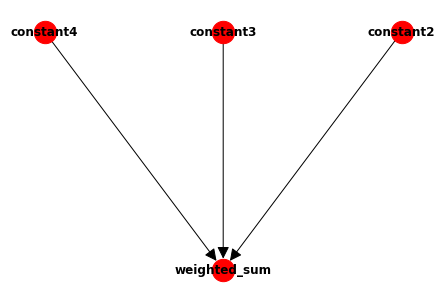

In [11]:
ws.draw()

## Nodes

In [12]:
from pct.nodes import PCTNode

In [13]:
node = PCTNode()

In [14]:
node.summary()

pctnode PCTNode
----------------------------
REF: constant5 Constant | 1 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  constant5 variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------


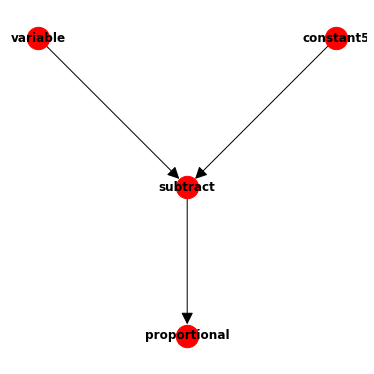

In [15]:
node.draw()

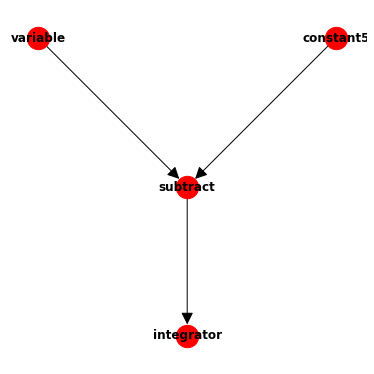

In [16]:
integ = Integration(10, 100, name="integrator", links=['subtract'], position=-1)
node.insert_function(collection = "output", function=integ)
node.draw()

In [17]:
out =node()
out

0.1

In [18]:
#FunctionsList.getInstance().report()

In [19]:
node.run(steps=10, verbose=True)

1.000 0.000 1.000 0.199 
1.000 0.000 1.000 0.297 
1.000 0.000 1.000 0.394 
1.000 0.000 1.000 0.490 
1.000 0.000 1.000 0.585 
1.000 0.000 1.000 0.679 
1.000 0.000 1.000 0.773 
1.000 0.000 1.000 0.865 
1.000 0.000 1.000 0.956 
1.000 0.000 1.000 1.047 


1.0466174574128355

## Hierarchies

In [20]:
from pct.hierarchy import PCTHierarchy

In [21]:
hpct = PCTHierarchy(2, 2, links="dense")

In [22]:
hpct.summary()

pcthierarchy PCTHierarchy
**************************
PRE: None
Level 0
level0col0 PCTNode
----------------------------
REF: weighted_sum WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  weighted_sum variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------
level0col1 PCTNode
----------------------------
REF: weighted_sum1 WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 10 | 0 | links  subtract1 
----------------------------
Level 1
level1col0 PCTNode
----------------------------
REF: constant Constant | 1 
PER: weighted_sum2 WeightedSum | weights [1. 1.] | 0 | links  variable variable1 
COM: subtract2 Subtract | 0 | links  constant weighted_sum2 
OUT: proportional2 Proportional | gain 10 | 0 | links  subt

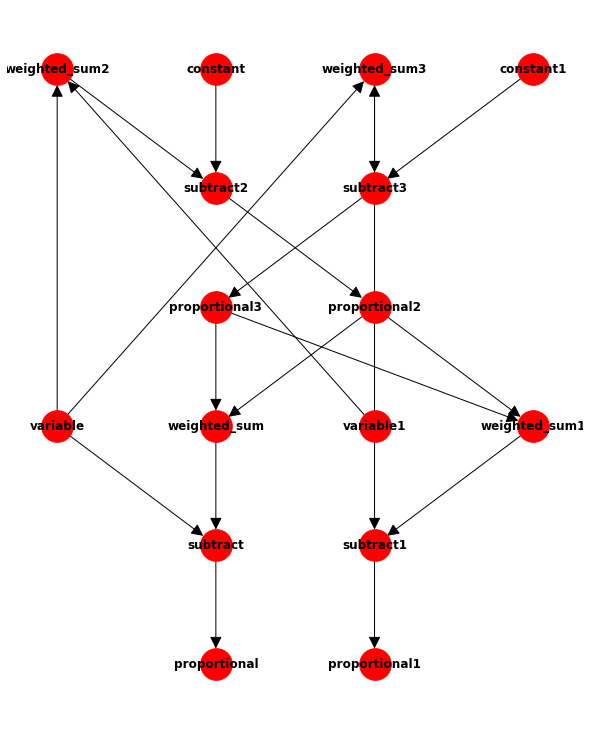

In [23]:
hpct.draw(figsize=(8, 10), node_size=1000)

In [24]:
cartpole_hierarchy = PCTHierarchy.load("cartpole.json")

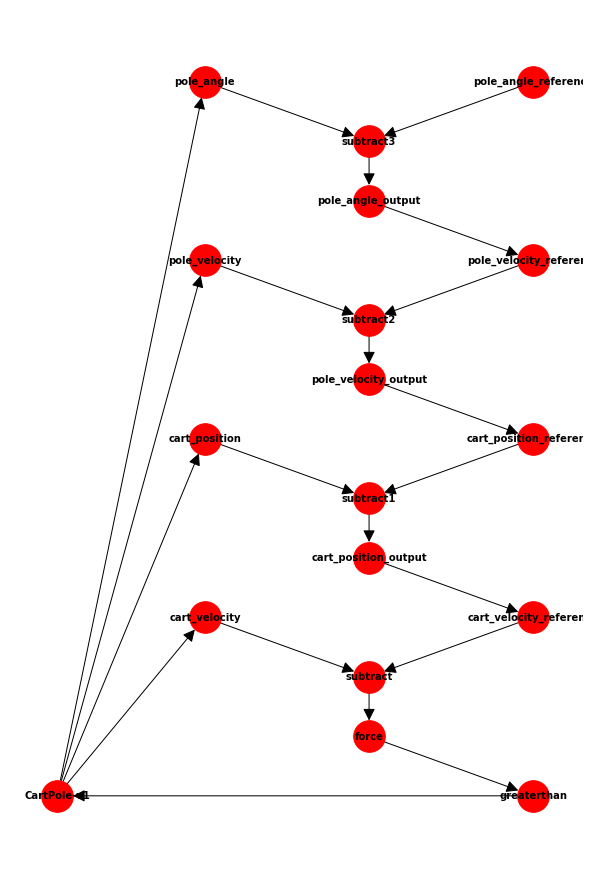

In [25]:
cartpole = FunctionsList.getInstance().get_function("CartPole-v1")
cartpole.render=True
cartpole_hierarchy.set_order("Down")
cartpole_hierarchy.draw(font_size=10, figsize=(8,12), move={'CartPole-v1': [-0.075, 0]}, node_size=1000)

In [26]:
cartpole_hierarchy.run(200)

OpenAIGym [-0.03584637 -0.24544917  0.02770357  0.26764592] [-0.03584637 -0.24544917  0.02770357  0.26764592]
OpenAIGym [-0.03584637 -0.24544917  0.02770357  0.26764592 -0.03584637 -0.24544917
  0.02770357  0.26764592]
OpenAIGym [-0.04075535 -0.05073333  0.03305648 -0.01617197] [-0.04075535 -0.05073333  0.03305648 -0.01617197]
OpenAIGym [-0.04075535 -0.05073333  0.03305648 -0.01617197 -0.04075535 -0.05073333
  0.03305648 -0.01617197]
OpenAIGym [-0.04177002  0.14389934  0.03273304 -0.29824464] [-0.04177002  0.14389934  0.03273304 -0.29824464]
OpenAIGym [-0.04177002  0.14389934  0.03273304 -0.29824464 -0.04177002  0.14389934
  0.03273304 -0.29824464]
OpenAIGym [-0.03889203 -0.05167354  0.02676815  0.00457934] [-0.03889203 -0.05167354  0.02676815  0.00457934]
OpenAIGym [-0.03889203 -0.05167354  0.02676815  0.00457934 -0.03889203 -0.05167354
  0.02676815  0.00457934]
OpenAIGym [-0.0399255  -0.24716896  0.02685974  0.30558631] [-0.0399255  -0.24716896  0.02685974  0.30558631]
OpenAIGym [-0.

OpenAIGym [ 0.01220506  0.13779989 -0.01503306 -0.16354682] [ 0.01220506  0.13779989 -0.01503306 -0.16354682]
OpenAIGym [ 0.01220506  0.13779989 -0.01503306 -0.16354682  0.01220506  0.13779989
 -0.01503306 -0.16354682]
OpenAIGym [ 0.01496106 -0.05710367 -0.018304    0.12435593] [ 0.01496106 -0.05710367 -0.018304    0.12435593]
OpenAIGym [ 0.01496106 -0.05710367 -0.018304    0.12435593  0.01496106 -0.05710367
 -0.018304    0.12435593]
OpenAIGym [ 0.01381899 -0.25195867 -0.01581688  0.4112084 ] [ 0.01381899 -0.25195867 -0.01581688  0.4112084 ]
OpenAIGym [ 0.01381899 -0.25195867 -0.01581688  0.4112084   0.01381899 -0.25195867
 -0.01581688  0.4112084 ]
OpenAIGym [ 0.00877981 -0.0566161  -0.00759271  0.11358124] [ 0.00877981 -0.0566161  -0.00759271  0.11358124]
OpenAIGym [ 0.00877981 -0.0566161  -0.00759271  0.11358124  0.00877981 -0.0566161
 -0.00759271  0.11358124]
OpenAIGym [ 0.00764749  0.13861381 -0.00532109 -0.18148744] [ 0.00764749  0.13861381 -0.00532109 -0.18148744]
OpenAIGym [ 0.0

OpenAIGym [-0.00721537 -0.05453059  0.00920171  0.06757479] [-0.00721537 -0.05453059  0.00920171  0.06757479]
OpenAIGym [-0.00721537 -0.05453059  0.00920171  0.06757479 -0.00721537 -0.05453059
  0.00920171  0.06757479]
OpenAIGym [-0.00830598  0.14045824  0.0105532  -0.2221908 ] [-0.00830598  0.14045824  0.0105532  -0.2221908 ]
OpenAIGym [-0.00830598  0.14045824  0.0105532  -0.2221908  -0.00830598  0.14045824
  0.0105532  -0.2221908 ]
OpenAIGym [-0.00549681  0.33542777  0.00610939 -0.51152623] [-0.00549681  0.33542777  0.00610939 -0.51152623]
OpenAIGym [-0.00549681  0.33542777  0.00610939 -0.51152623 -0.00549681  0.33542777
  0.00610939 -0.51152623]
OpenAIGym [ 0.00121174  0.1402203  -0.00412114 -0.21692433] [ 0.00121174  0.1402203  -0.00412114 -0.21692433]
OpenAIGym [ 0.00121174  0.1402203  -0.00412114 -0.21692433  0.00121174  0.1402203
 -0.00412114 -0.21692433]
OpenAIGym [ 0.00401615 -0.0548425  -0.00845962  0.07445576] [ 0.00401615 -0.0548425  -0.00845962  0.07445576]
OpenAIGym [ 0.0

OpenAIGym [-0.00736686  0.13901873  0.00952361 -0.19043217] [-0.00736686  0.13901873  0.00952361 -0.19043217]
OpenAIGym [-0.00736686  0.13901873  0.00952361 -0.19043217 -0.00736686  0.13901873
  0.00952361 -0.19043217]
OpenAIGym [-0.00458649  0.33400315  0.00571496 -0.48009564] [-0.00458649  0.33400315  0.00571496 -0.48009564]
OpenAIGym [-0.00458649  0.33400315  0.00571496 -0.48009564 -0.00458649  0.33400315
  0.00571496 -0.48009564]
OpenAIGym [ 0.00209357  0.13880099 -0.00388695 -0.18561699] [ 0.00209357  0.13880099 -0.00388695 -0.18561699]
OpenAIGym [ 0.00209357  0.13880099 -0.00388695 -0.18561699  0.00209357  0.13880099
 -0.00388695 -0.18561699]
OpenAIGym [ 0.00486959 -0.05626513 -0.00759929  0.10583722] [ 0.00486959 -0.05626513 -0.00759929  0.10583722]
OpenAIGym [ 0.00486959 -0.05626513 -0.00759929  0.10583722  0.00486959 -0.05626513
 -0.00759929  0.10583722]
OpenAIGym [ 0.00374429 -0.25127736 -0.00548254  0.39611295] [ 0.00374429 -0.25127736 -0.00548254  0.39611295]
OpenAIGym [ 0.

OpenAIGym [-0.00368894  0.33538019  0.00560849 -0.51047512] [-0.00368894  0.33538019  0.00560849 -0.51047512]
OpenAIGym [-0.00368894  0.33538019  0.00560849 -0.51047512 -0.00368894  0.33538019
  0.00560849 -0.51047512]
OpenAIGym [ 0.00301866  0.14017968 -0.00460101 -0.21603008] [ 0.00301866  0.14017968 -0.00460101 -0.21603008]
OpenAIGym [ 0.00301866  0.14017968 -0.00460101 -0.21603008  0.00301866  0.14017968
 -0.00460101 -0.21603008]
OpenAIGym [ 0.00582225 -0.0548762  -0.00892161  0.07519795] [ 0.00582225 -0.0548762  -0.00892161  0.07519795]
OpenAIGym [ 0.00582225 -0.0548762  -0.00892161  0.07519795  0.00582225 -0.0548762
 -0.00892161  0.07519795]
OpenAIGym [ 0.00472473 -0.24986912 -0.00741765  0.36505277] [ 0.00472473 -0.24986912 -0.00741765  0.36505277]
OpenAIGym [ 0.00472473 -0.24986912 -0.00741765  0.36505277  0.00472473 -0.24986912
 -0.00741765  0.36505277]
OpenAIGym [-2.72653923e-04 -4.44884874e-01 -1.16595146e-04  6.55387588e-01] [-2.72653923e-04 -4.44884874e-01 -1.16595146e-04 

OpenAIGym [-0.00276364  0.33384027  0.00488234 -0.47649972] [-0.00276364  0.33384027  0.00488234 -0.47649972]
OpenAIGym [-0.00276364  0.33384027  0.00488234 -0.47649972 -0.00276364  0.33384027
  0.00488234 -0.47649972]
OpenAIGym [ 0.00391316  0.13864972 -0.00464765 -0.18228199] [ 0.00391316  0.13864972 -0.00464765 -0.18228199]
OpenAIGym [ 0.00391316  0.13864972 -0.00464765 -0.18228199  0.00391316  0.13864972
 -0.00464765 -0.18228199]
OpenAIGym [ 0.00668616 -0.05640542 -0.00829329  0.10893116] [ 0.00668616 -0.05640542 -0.00829329  0.10893116]
OpenAIGym [ 0.00668616 -0.05640542 -0.00829329  0.10893116  0.00668616 -0.05640542
 -0.00829329  0.10893116]
OpenAIGym [ 0.00555805 -0.25140755 -0.00611467  0.3989861 ] [ 0.00555805 -0.25140755 -0.00611467  0.3989861 ]
OpenAIGym [ 0.00555805 -0.25140755 -0.00611467  0.3989861   0.00555805 -0.25140755
 -0.00611467  0.3989861 ]
OpenAIGym [ 0.0005299  -0.0561994   0.00186505  0.10438163] [ 0.0005299  -0.0561994   0.00186505  0.10438163]
OpenAIGym [ 0.

1

In [27]:
#cartpole_hierarchy.summary()

In [28]:
cartpole.close()

In [29]:
pole_position_node = PCTNode.from_config({ 'name': 'pole_position_node', 
    'refcoll': {'0': {'type': 'Step', 'name': 'pole_position_reference', 'value': 0, 'upper' : 2, 'lower' :-2, 'delay' :100, 'period' :500, 'links': {}}}, 
    'percoll': {'0': {'type': 'IndexedParameter', 'name': 'pole_position', 'value': 0, 'index' :4, 'links': {0: 'CartPole-v1'}}}, 
    'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract4', 'value': 0, 'links': {0: 'pole_position_reference', 1: 'pole_position'}}}, 
    'outcoll': {'0': {'type': 'Sigmoid', 'name': 'pole_position_output', 'value': 0, 'links': {0: 'subtract4'}, 'range': 0.45, 'scale': 2}}})

In [30]:
cartpole_hierarchy.add_node(pole_position_node, level=4)

In [31]:
# pole_angle
cartpole_hierarchy.replace_function(level=3, col=0, collection="reference", function=PassOn(name="pole_angle_reference", links=['pole_position_output']), position=0)
FunctionsList.getInstance().get_function("pole_angle_output").set_property('gain', 1.5)
cartpole_hierarchy.set_links('subtract3', 'pole_angle_reference',  'pole_angle')

# pole_velocity
cartpole_hierarchy.replace_function(level=2, col=0, collection="output", function=PassOn(name="pole_velocity_output", links=['subtract2']), position=0)

# cart_position
cartpole_hierarchy.replace_function(level=1, col=0, collection="reference", function=IntegrationDual(name="cart_position_reference", gain=90, slow=100, links=['pole_velocity_output']), position=0)
cartpole_hierarchy.add_links( 'cart_position_reference',  'cart_position')
cartpole_hierarchy.set_links('subtract1', 'cart_position_reference',  'cart_position')

# force
FunctionsList.getInstance().get_function("force").set_property('gain', -0.1)


In [32]:
#cartpole_hierarchy.summary()

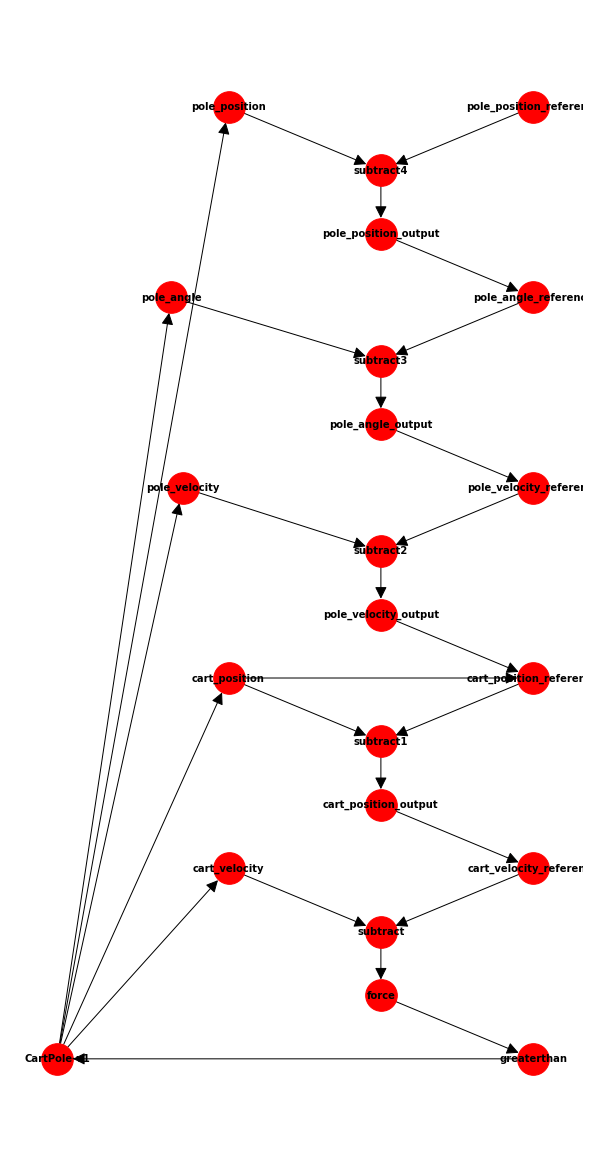

In [33]:
cartpole_hierarchy.draw(font_size=10, figsize=(8,16), move={'CartPole-v1': [-0.075, 0] , 'pole_velocity': [-0.02, 0], 'pole_angle': [-0.025, 0]}, node_size=1000)

In [34]:
#cartpole_hierarchy.clear_values()
#cartpole_hierarchy.save("cartpole5-added.json")

In [35]:
cartpole_hierarchy.run(30, verbose=True)


OpenAIGym [-0.00059409  0.13889578  0.00395268 -0.1877123 ] [-0.00059409  0.13889578  0.00395268 -0.1877123 ]
OpenAIGym [-0.00059409  0.13889578  0.00395268 -0.1877123  -0.00059409  0.13889578
  0.00395268 -0.1877123 ]
-0.001 0.139 0.004 -0.188 -0.001 0.139 0.004 -0.188 1.0 False {} 
pole_position_node 0.000 -0.001 0.001 0.000 
pole_angle_node 0.000 0.004 -0.004 -0.005 
pole_velocity_node -0.005 -0.188 0.182 0.182 
cart_position_node 0.165 -0.001 0.165 0.330 
cart_velocity_node 0.330 0.139 0.191 -0.004 
0.000 

OpenAIGym [ 0.00218382 -0.0562825   0.00019844  0.10621492] [ 0.00218382 -0.0562825   0.00019844  0.10621492]
OpenAIGym [ 0.00218382 -0.0562825   0.00019844  0.10621492  0.00218382 -0.0562825
  0.00019844  0.10621492]
0.002 -0.056 0.000 0.106 0.002 -0.056 0.000 0.106 1.0 False {} 
pole_position_node 0.000 0.002 -0.002 -0.001 
pole_angle_node -0.001 0.000 -0.001 -0.002 
pole_velocity_node -0.002 0.106 -0.108 -0.108 
cart_position_node -0.098 0.002 -0.100 -0.200 
cart_velocity_nod

0.014 0.139 -0.011 -0.191 0.014 0.139 -0.011 -0.191 1.0 False {} 
pole_position_node 0.000 0.014 -0.014 -0.007 
pole_angle_node -0.007 -0.011 0.004 0.006 
pole_velocity_node 0.006 -0.191 0.196 0.196 
cart_position_node 0.184 0.014 0.170 0.339 
cart_velocity_node 0.339 0.139 0.200 -0.014 
0.000 

OpenAIGym [ 0.01706243 -0.05594283 -0.01465183  0.09873437] [ 0.01706243 -0.05594283 -0.01465183  0.09873437]
OpenAIGym [ 0.01706243 -0.05594283 -0.01465183  0.09873437  0.01706243 -0.05594283
 -0.01465183  0.09873437]
0.017 -0.056 -0.015 0.099 0.017 -0.056 -0.015 0.099 1.0 False {} 
pole_position_node 0.000 0.017 -0.017 -0.009 
pole_angle_node -0.009 -0.015 0.006 0.009 
pole_velocity_node 0.009 0.099 -0.090 -0.090 
cart_position_node -0.066 0.017 -0.084 -0.167 
cart_velocity_node -0.167 -0.056 -0.111 -0.008 
0.000 

OpenAIGym [ 0.01594358 -0.25085176 -0.01267714  0.3867589 ] [ 0.01594358 -0.25085176 -0.01267714  0.3867589 ]
OpenAIGym [ 0.01594358 -0.25085176 -0.01267714  0.3867589   0.01594358

pole_velocity_node 0.002 0.042 -0.040 -0.040 
cart_position_node -0.032 0.006 -0.039 -0.077 
cart_velocity_node -0.077 -0.053 -0.024 -0.002 
0.000 

OpenAIGym [ 0.00539162 -0.24842259 -0.00394015  0.33312819] [ 0.00539162 -0.24842259 -0.00394015  0.33312819]
OpenAIGym [ 0.00539162 -0.24842259 -0.00394015  0.33312819  0.00539162 -0.24842259
 -0.00394015  0.33312819]
0.005 -0.248 -0.004 0.333 0.005 -0.248 -0.004 0.333 1.0 False {} 
pole_position_node 0.000 0.005 -0.005 -0.003 
pole_angle_node -0.003 -0.004 0.001 0.002 
pole_velocity_node 0.002 0.333 -0.331 -0.331 
cart_position_node -0.292 0.005 -0.297 -0.594 
cart_velocity_node -0.594 -0.248 -0.346 0.007 
1.000 

OpenAIGym [ 0.00042317 -0.05324478  0.00272242  0.03920535] [ 0.00042317 -0.05324478  0.00272242  0.03920535]
OpenAIGym [ 0.00042317 -0.05324478  0.00272242  0.03920535  0.00042317 -0.05324478
  0.00272242  0.03920535]
0.000 -0.053 0.003 0.039 0.000 -0.053 0.003 0.039 1.0 False {} 
pole_position_node 0.000 0.000 -0.000 -0.000 


-0.005 -0.251 0.000 0.383 -0.005 -0.251 0.000 0.383 1.0 False {} 
pole_position_node 0.000 -0.005 0.005 0.002 
pole_angle_node 0.002 0.000 0.002 0.003 
pole_velocity_node 0.003 0.383 -0.380 -0.380 
cart_position_node -0.346 -0.005 -0.341 -0.682 
cart_velocity_node -0.682 -0.251 -0.431 0.004 
1.000 

OpenAIGym [-0.00997825 -0.05557936  0.00813066  0.09070666] [-0.00997825 -0.05557936  0.00813066  0.09070666]
OpenAIGym [-0.00997825 -0.05557936  0.00813066  0.09070666 -0.00997825 -0.05557936
  0.00813066  0.09070666]
-0.010 -0.056 0.008 0.091 -0.010 -0.056 0.008 0.091 1.0 False {} 
pole_position_node 0.000 -0.010 0.010 0.005 
pole_angle_node 0.005 0.008 -0.003 -0.005 
pole_velocity_node -0.005 0.091 -0.095 -0.095 
cart_position_node -0.091 -0.010 -0.081 -0.162 
cart_velocity_node -0.162 -0.056 -0.106 0.006 
1.000 

OpenAIGym [-0.01108983  0.13942511  0.00994479 -0.1994    ] [-0.01108983  0.13942511  0.00994479 -0.1994    ]
OpenAIGym [-0.01108983  0.13942511  0.00994479 -0.1994     -0.0110

cart_position_node 0.414 0.002 0.412 0.823 
cart_velocity_node 0.823 0.333 0.490 -0.009 
0.000 

OpenAIGym [ 0.00861966  0.1381789  -0.00701983 -0.17189757] [ 0.00861966  0.1381789  -0.00701983 -0.17189757]
OpenAIGym [ 0.00861966  0.1381789  -0.00701983 -0.17189757  0.00861966  0.1381789
 -0.00701983 -0.17189757]
0.009 0.138 -0.007 -0.172 0.009 0.138 -0.007 -0.172 1.0 False {} 
pole_position_node 0.000 0.009 -0.009 -0.004 
pole_angle_node -0.004 -0.007 0.003 0.004 
pole_velocity_node 0.004 -0.172 0.176 0.176 
cart_position_node 0.160 0.009 0.152 0.303 
cart_velocity_node 0.303 0.138 0.165 -0.011 
0.000 

OpenAIGym [ 0.01138324 -0.05684188 -0.01045778  0.11856258] [ 0.01138324 -0.05684188 -0.01045778  0.11856258]
OpenAIGym [ 0.01138324 -0.05684188 -0.01045778  0.11856258  0.01138324 -0.05684188
 -0.01045778  0.11856258]
0.011 -0.057 -0.010 0.119 0.011 -0.057 -0.010 0.119 1.0 False {} 
pole_position_node 0.000 0.011 -0.011 -0.006 
pole_angle_node -0.006 -0.010 0.005 0.007 
pole_velocity_

-0.044 0.512 0.118 -0.393 -0.044 0.512 0.118 -0.393 1.0 False {} 
pole_position_node 2.000 -0.044 2.044 0.225 
pole_angle_node 0.225 0.118 0.107 0.160 
pole_velocity_node 0.160 -0.393 0.553 0.553 
cart_position_node 0.449 -0.044 0.492 0.984 
cart_velocity_node 0.984 0.512 0.472 -0.010 
0.000 

OpenAIGym [-0.03334266  0.31519806  0.11038428 -0.0657466 ] [-0.03334266  0.31519806  0.11038428 -0.0657466 ]
OpenAIGym [-0.03334266  0.31519806  0.11038428 -0.0657466  -0.03334266  0.31519806
  0.11038428 -0.0657466 ]
-0.033 0.315 0.110 -0.066 -0.033 0.315 0.110 -0.066 1.0 False {} 
pole_position_node 2.000 -0.033 2.033 0.225 
pole_angle_node 0.225 0.110 0.115 0.172 
pole_velocity_node 0.172 -0.066 0.238 0.238 
cart_position_node 0.171 -0.033 0.204 0.408 
cart_velocity_node 0.408 0.315 0.093 -0.010 
0.000 

OpenAIGym [-0.0270387   0.11868083  0.10906935  0.25962231] [-0.0270387   0.11868083  0.10906935  0.25962231]
OpenAIGym [-0.0270387   0.11868083  0.10906935  0.25962231 -0.0270387   0.1186808

0.279 0.866 0.041 -0.185 0.279 0.866 0.041 -0.185 1.0 False {} 
pole_position_node 2.000 0.279 1.721 0.225 
pole_angle_node 0.225 0.041 0.184 0.276 
pole_velocity_node 0.276 -0.185 0.460 0.460 
cart_position_node 0.669 0.279 0.390 0.781 
cart_velocity_node 0.781 0.866 -0.085 0.001 
1.000 

OpenAIGym [ 0.29598503  1.06066193  0.0372897  -0.46399256] [ 0.29598503  1.06066193  0.0372897  -0.46399256]
OpenAIGym [ 0.29598503  1.06066193  0.0372897  -0.46399256  0.29598503  1.06066193
  0.0372897  -0.46399256]
0.296 1.061 0.037 -0.464 0.296 1.061 0.037 -0.464 1.0 False {} 
pole_position_node 2.000 0.296 1.704 0.225 
pole_angle_node 0.225 0.037 0.187 0.281 
pole_velocity_node 0.281 -0.464 0.745 0.745 
cart_position_node 0.947 0.296 0.651 1.301 
cart_velocity_node 1.301 1.061 0.240 -0.005 
0.000 

OpenAIGym [ 0.31719827  0.86503341  0.02800985 -0.15979314] [ 0.31719827  0.86503341  0.02800985 -0.15979314]
OpenAIGym [ 0.31719827  0.86503341  0.02800985 -0.15979314  0.31719827  0.86503341
  0.02

pole_velocity_node 0.386 -0.239 0.625 0.625 
cart_position_node 1.236 0.694 0.542 1.084 
cart_velocity_node 1.084 0.869 0.216 0.002 
1.000 

OpenAIGym [ 0.71115472  1.06420477 -0.03837261 -0.54203327] [ 0.71115472  1.06420477 -0.03837261 -0.54203327]
OpenAIGym [ 0.71115472  1.06420477 -0.03837261 -0.54203327  0.71115472  1.06420477
 -0.03837261 -0.54203327]
0.711 1.064 -0.038 -0.542 0.711 1.064 -0.038 -0.542 1.0 False {} 
pole_position_node 2.000 0.711 1.289 0.224 
pole_angle_node 0.224 -0.038 0.262 0.393 
pole_velocity_node 0.393 -0.542 0.935 0.935 
cart_position_node 1.528 0.711 0.817 1.634 
cart_velocity_node 1.634 1.064 0.570 -0.013 
0.000 

OpenAIGym [ 0.73243881  0.86964255 -0.04921328 -0.26168356] [ 0.73243881  0.86964255 -0.04921328 -0.26168356]
OpenAIGym [ 0.73243881  0.86964255 -0.04921328 -0.26168356  0.73243881  0.86964255
 -0.04921328 -0.26168356]
0.732 0.870 -0.049 -0.262 0.732 0.870 -0.049 -0.262 1.0 False {} 
pole_position_node 2.000 0.732 1.268 0.223 
pole_angle_node 0

0.991 0.686 -0.018 -0.227 0.991 0.686 -0.018 -0.227 1.0 False {} 
pole_position_node 2.000 0.991 1.009 0.220 
pole_angle_node 0.220 -0.018 0.238 0.357 
pole_velocity_node 0.357 -0.227 0.583 0.583 
cart_position_node 1.496 0.991 0.505 1.011 
cart_velocity_node 1.011 0.686 0.325 -0.005 
0.000 

OpenAIGym [ 1.00475025  0.49135446 -0.02225749  0.06025259] [ 1.00475025  0.49135446 -0.02225749  0.06025259]
OpenAIGym [ 1.00475025  0.49135446 -0.02225749  0.06025259  1.00475025  0.49135446
 -0.02225749  0.06025259]
1.005 0.491 -0.022 0.060 1.005 0.491 -0.022 0.060 1.0 False {} 
pole_position_node 2.000 1.005 0.995 0.220 
pole_angle_node 0.220 -0.022 0.242 0.363 
pole_velocity_node 0.363 0.060 0.303 0.303 
cart_position_node 1.253 1.005 0.249 0.497 
cart_velocity_node 0.497 0.491 0.006 -0.004 
0.000 

OpenAIGym [ 1.01457734  0.29655859 -0.02105244  0.34583086] [ 1.01457734  0.29655859 -0.02105244  0.34583086]
OpenAIGym [ 1.01457734  0.29655859 -0.02105244  0.34583086  1.01457734  0.29655859
 -0

1.234 0.494 -0.004 -0.004 1.234 0.494 -0.004 -0.004 1.0 False {} 
pole_position_node 2.000 1.234 0.766 0.211 
pole_angle_node 0.211 -0.004 0.214 0.321 
pole_velocity_node 0.321 -0.004 0.325 0.325 
cart_position_node 1.500 1.234 0.266 0.533 
cart_velocity_node 0.533 0.494 0.038 -0.007 
0.000 

OpenAIGym [ 1.24367286  0.29917766 -0.00359429  0.28795616] [ 1.24367286  0.29917766 -0.00359429  0.28795616]
OpenAIGym [ 1.24367286  0.29917766 -0.00359429  0.28795616  1.24367286  0.29917766
 -0.00359429  0.28795616]
1.244 0.299 -0.004 0.288 1.244 0.299 -0.004 0.288 1.0 False {} 
pole_position_node 2.000 1.244 0.756 0.210 
pole_angle_node 0.210 -0.004 0.214 0.320 
pole_velocity_node 0.320 0.288 0.032 0.032 
cart_position_node 1.251 1.244 0.007 0.014 
cart_velocity_node 0.014 0.299 -0.285 0.002 
1.000 

OpenAIGym [ 1.24965641  0.49435068  0.00216483 -0.0058582 ] [ 1.24965641  0.49435068  0.00216483 -0.0058582 ]
OpenAIGym [ 1.24965641  0.49435068  0.00216483 -0.0058582   1.24965641  0.49435068
  0

1.481 0.300 -0.009 0.269 1.481 0.300 -0.009 0.269 1.0 False {} 
pole_position_node 2.000 1.481 0.519 0.184 
pole_angle_node 0.184 -0.009 0.193 0.289 
pole_velocity_node 0.289 0.269 0.020 0.020 
cart_position_node 1.475 1.481 -0.007 -0.013 
cart_velocity_node -0.013 0.300 -0.313 0.004 
1.000 

OpenAIGym [ 1.4870667   0.4952677  -0.00333648 -0.02608736] [ 1.4870667   0.4952677  -0.00333648 -0.02608736]
OpenAIGym [ 1.4870667   0.4952677  -0.00333648 -0.02608736  1.4870667   0.4952677
 -0.00333648 -0.02608736]
1.487 0.495 -0.003 -0.026 1.487 0.495 -0.003 -0.026 1.0 False {} 
pole_position_node 2.000 1.487 0.513 0.183 
pole_angle_node 0.183 -0.003 0.187 0.280 
pole_velocity_node 0.280 -0.026 0.306 0.306 
cart_position_node 1.742 1.487 0.255 0.509 
cart_velocity_node 0.509 0.495 0.014 0.003 
1.000 

OpenAIGym [ 1.49697205  0.69043734 -0.00385823 -0.31982111] [ 1.49697205  0.69043734 -0.00385823 -0.31982111]
OpenAIGym [ 1.49697205  0.69043734 -0.00385823 -0.31982111  1.49697205  0.69043734
 -

1.718 0.501 -0.024 -0.143 1.718 0.501 -0.024 -0.143 1.0 False {} 
pole_position_node 2.000 1.718 0.282 0.125 
pole_angle_node 0.125 -0.024 0.149 0.224 
pole_velocity_node 0.224 -0.143 0.366 0.366 
cart_position_node 2.024 1.718 0.306 0.613 
cart_velocity_node 0.613 0.501 0.112 0.000 
1.000 

OpenAIGym [ 1.72790491  0.6960019  -0.02693372 -0.44268797] [ 1.72790491  0.6960019  -0.02693372 -0.44268797]
OpenAIGym [ 1.72790491  0.6960019  -0.02693372 -0.44268797  1.72790491  0.6960019
 -0.02693372 -0.44268797]
1.728 0.696 -0.027 -0.443 1.728 0.696 -0.027 -0.443 1.0 False {} 
pole_position_node 2.000 1.728 0.272 0.122 
pole_angle_node 0.122 -0.027 0.149 0.223 
pole_velocity_node 0.223 -0.443 0.665 0.665 
cart_position_node 2.300 1.728 0.572 1.143 
cart_velocity_node 1.143 0.696 0.447 -0.011 
0.000 

OpenAIGym [ 1.74182495  0.50127121 -0.03578748 -0.15861544] [ 1.74182495  0.50127121 -0.03578748 -0.15861544]
OpenAIGym [ 1.74182495  0.50127121 -0.03578748 -0.15861544  1.74182495  0.50127121
 -

1.892 0.515 -0.037 -0.454 1.892 0.515 -0.037 -0.454 1.0 False {} 
pole_position_node 2.000 1.892 0.108 0.053 
pole_angle_node 0.053 -0.037 0.090 0.135 
pole_velocity_node 0.135 -0.454 0.589 0.589 
cart_position_node 2.397 1.892 0.505 1.010 
cart_velocity_node 1.010 0.515 0.496 -0.008 
0.000 

OpenAIGym [ 1.90203836  0.32008991 -0.0459339  -0.17352578] [ 1.90203836  0.32008991 -0.0459339  -0.17352578]
OpenAIGym [ 1.90203836  0.32008991 -0.0459339  -0.17352578  1.90203836  0.32008991
 -0.0459339  -0.17352578]
1.902 0.320 -0.046 -0.174 1.902 0.320 -0.046 -0.174 1.0 False {} 
pole_position_node 2.000 1.902 0.098 0.048 
pole_angle_node 0.048 -0.046 0.094 0.141 
pole_velocity_node 0.141 -0.174 0.315 0.315 
cart_position_node 2.156 1.902 0.254 0.508 
cart_velocity_node 0.508 0.320 0.188 -0.010 
0.000 

OpenAIGym [ 1.90844016  0.12565444 -0.04940441  0.10431998] [ 1.90844016  0.12565444 -0.04940441  0.10431998]
OpenAIGym [ 1.90844016  0.12565444 -0.04940441  0.10431998  1.90844016  0.12565444


1.939 0.137 -0.020 -0.151 1.939 0.137 -0.020 -0.151 1.0 False {} 
pole_position_node 2.000 1.939 0.061 0.030 
pole_angle_node 0.030 -0.020 0.051 0.076 
pole_velocity_node 0.076 -0.151 0.227 0.227 
cart_position_node 2.125 1.939 0.186 0.372 
cart_velocity_node 0.372 0.137 0.234 0.000 
1.000 

OpenAIGym [ 1.94178082  0.33261005 -0.02348082 -0.44961768] [ 1.94178082  0.33261005 -0.02348082 -0.44961768]
OpenAIGym [ 1.94178082  0.33261005 -0.02348082 -0.44961768  1.94178082  0.33261005
 -0.02348082 -0.44961768]
1.942 0.333 -0.023 -0.450 1.942 0.333 -0.023 -0.450 1.0 False {} 
pole_position_node 2.000 1.942 0.058 0.029 
pole_angle_node 0.029 -0.023 0.052 0.079 
pole_velocity_node 0.079 -0.450 0.528 0.528 
cart_position_node 2.395 1.942 0.453 0.907 
cart_velocity_node 0.907 0.333 0.574 -0.014 
0.000 

OpenAIGym [ 1.94843302  0.13782795 -0.03247317 -0.1644278 ] [ 1.94843302  0.13782795 -0.03247317 -0.1644278 ]
OpenAIGym [ 1.94843302  0.13782795 -0.03247317 -0.1644278   1.94843302  0.13782795
 

pole_position_node 2.000 1.915 0.085 0.042 
pole_angle_node 0.042 0.014 0.028 0.042 
pole_velocity_node 0.042 -0.516 0.558 0.558 
cart_position_node 2.396 1.915 0.480 0.961 
cart_velocity_node 0.961 0.336 0.625 -0.014 
0.000 

OpenAIGym [ 1.92209846  0.14030137  0.00341191 -0.2189081 ] [ 1.92209846  0.14030137  0.00341191 -0.2189081 ]
OpenAIGym [ 1.92209846  0.14030137  0.00341191 -0.2189081   1.92209846  0.14030137
  0.00341191 -0.2189081 ]
1.922 0.140 0.003 -0.219 1.922 0.140 0.003 -0.219 1.0 False {} 
pole_position_node 2.000 1.922 0.078 0.039 
pole_angle_node 0.039 0.003 0.035 0.053 
pole_velocity_node 0.053 -0.219 0.272 0.272 
cart_position_node 2.141 1.922 0.219 0.437 
cart_velocity_node 0.437 0.140 0.297 -0.018 
0.000 

OpenAIGym [ 1.92490448e+00 -5.48691865e-02 -9.66255441e-04  7.48491262e-02] [ 1.92490448e+00 -5.48691865e-02 -9.66255441e-04  7.48491262e-02]
OpenAIGym [ 1.92490448e+00 -5.48691865e-02 -9.66255441e-04  7.48491262e-02
  1.92490448e+00 -5.48691865e-02 -9.66255441e-

pole_position_node -2.000 1.983 -3.983 -0.225 
pole_angle_node -0.225 -0.119 -0.106 -0.159 
pole_velocity_node -0.159 -0.004 -0.155 -0.155 
cart_position_node 1.833 1.983 -0.150 -0.301 
cart_velocity_node -0.301 -0.233 -0.068 0.009 
1.000 

OpenAIGym [ 1.97829775 -0.03653281 -0.11938453 -0.33182144] [ 1.97829775 -0.03653281 -0.11938453 -0.33182144]
OpenAIGym [ 1.97829775 -0.03653281 -0.11938453 -0.33182144  1.97829775 -0.03653281
 -0.11938453 -0.33182144]
1.978 -0.037 -0.119 -0.332 1.978 -0.037 -0.119 -0.332 1.0 False {} 
pole_position_node -2.000 1.978 -3.978 -0.225 
pole_angle_node -0.225 -0.119 -0.106 -0.158 
pole_velocity_node -0.158 -0.332 0.173 0.173 
cart_position_node 2.119 1.978 0.141 0.282 
cart_velocity_node 0.282 -0.037 0.318 -0.001 
0.000 

OpenAIGym [ 1.97756709 -0.22977106 -0.12602096 -0.07904297] [ 1.97756709 -0.22977106 -0.12602096 -0.07904297]
OpenAIGym [ 1.97756709 -0.22977106 -0.12602096 -0.07904297  1.97756709 -0.22977106
 -0.12602096 -0.07904297]
1.978 -0.230 -0.1

1.689 -1.171 -0.063 0.620 1.689 -1.171 -0.063 0.620 1.0 False {} 
pole_position_node -2.000 1.689 -3.689 -0.225 
pole_angle_node -0.225 -0.063 -0.162 -0.243 
pole_velocity_node -0.243 0.620 -0.863 -0.863 
cart_position_node 0.915 1.689 -0.774 -1.548 
cart_velocity_node -1.548 -1.171 -0.378 0.003 
1.000 

OpenAIGym [ 1.66577609 -0.97468879 -0.05077959  0.30820171] [ 1.66577609 -0.97468879 -0.05077959  0.30820171]
OpenAIGym [ 1.66577609 -0.97468879 -0.05077959  0.30820171  1.66577609 -0.97468879
 -0.05077959  0.30820171]
1.666 -0.975 -0.051 0.308 1.666 -0.975 -0.051 0.308 1.0 False {} 
pole_position_node -2.000 1.666 -3.666 -0.225 
pole_angle_node -0.225 -0.051 -0.174 -0.261 
pole_velocity_node -0.261 0.308 -0.570 -0.570 
cart_position_node 1.160 1.666 -0.506 -1.012 
cart_velocity_node -1.012 -0.975 -0.037 0.003 
1.000 

OpenAIGym [ 1.64628231e+00 -7.78881453e-01 -4.46155522e-02 -5.34871601e-05] [ 1.64628231e+00 -7.78881453e-01 -4.46155522e-02 -5.34871601e-05]
OpenAIGym [ 1.64628231e+00 

1.203 -0.780 0.039 0.031 1.203 -0.780 0.039 0.031 1.0 False {} 
pole_position_node -2.000 1.203 -3.203 -0.225 
pole_angle_node -0.225 0.039 -0.264 -0.397 
pole_velocity_node -0.397 0.031 -0.427 -0.427 
cart_position_node 0.818 1.203 -0.385 -0.770 
cart_velocity_node -0.770 -0.780 0.010 -0.002 
0.000 

OpenAIGym [ 1.18753425 -0.97594255  0.04008948  0.33563646] [ 1.18753425 -0.97594255  0.04008948  0.33563646]
OpenAIGym [ 1.18753425 -0.97594255  0.04008948  0.33563646  1.18753425 -0.97594255
  0.04008948  0.33563646]
1.188 -0.976 0.040 0.336 1.188 -0.976 0.040 0.336 1.0 False {} 
pole_position_node -2.000 1.188 -3.188 -0.225 
pole_angle_node -0.225 0.040 -0.265 -0.398 
pole_velocity_node -0.398 0.336 -0.733 -0.733 
cart_position_node 0.531 1.188 -0.656 -1.313 
cart_velocity_node -1.313 -0.976 -0.337 0.007 
1.000 

OpenAIGym [ 1.1680154  -0.78141339  0.04680221  0.05586031] [ 1.1680154  -0.78141339  0.04680221  0.05586031]
OpenAIGym [ 1.1680154  -0.78141339  0.04680221  0.05586031  1.168

0.895 -0.404 0.026 -0.240 0.895 -0.404 0.026 -0.240 1.0 False {} 
pole_position_node -2.000 0.895 -2.895 -0.225 
pole_angle_node -0.225 0.026 -0.251 -0.376 
pole_velocity_node -0.376 -0.240 -0.136 -0.136 
cart_position_node 0.776 0.895 -0.120 -0.239 
cart_velocity_node -0.239 -0.404 0.165 -0.003 
0.000 

OpenAIGym [ 0.88727131 -0.59976866  0.02109513  0.06042695] [ 0.88727131 -0.59976866  0.02109513  0.06042695]
OpenAIGym [ 0.88727131 -0.59976866  0.02109513  0.06042695  0.88727131 -0.59976866
  0.02109513  0.06042695]
0.887 -0.600 0.021 0.060 0.887 -0.600 0.021 0.060 1.0 False {} 
pole_position_node -2.000 0.887 -2.887 -0.225 
pole_angle_node -0.225 0.021 -0.246 -0.369 
pole_velocity_node -0.369 0.060 -0.430 -0.430 
cart_position_node 0.500 0.887 -0.387 -0.775 
cart_velocity_node -0.775 -0.600 -0.175 0.002 
1.000 

OpenAIGym [ 0.87527594 -0.40495542  0.02230367 -0.22552638] [ 0.87527594 -0.40495542  0.02230367 -0.22552638]
OpenAIGym [ 0.87527594 -0.40495542  0.02230367 -0.22552638  0.

0.641 -0.406 -0.012 -0.192 0.641 -0.406 -0.012 -0.192 1.0 False {} 
pole_position_node -2.000 0.641 -2.641 -0.225 
pole_angle_node -0.225 -0.012 -0.213 -0.319 
pole_velocity_node -0.319 -0.192 -0.127 -0.127 
cart_position_node 0.524 0.641 -0.117 -0.233 
cart_velocity_node -0.233 -0.406 0.173 -0.010 
0.000 

OpenAIGym [ 0.63305233 -0.60141558 -0.01597765  0.09675796] [ 0.63305233 -0.60141558 -0.01597765  0.09675796]
OpenAIGym [ 0.63305233 -0.60141558 -0.01597765  0.09675796  0.63305233 -0.60141558
 -0.01597765  0.09675796]
0.633 -0.601 -0.016 0.097 0.633 -0.601 -0.016 0.097 1.0 False {} 
pole_position_node -2.000 0.633 -2.633 -0.225 
pole_angle_node -0.225 -0.016 -0.209 -0.314 
pole_velocity_node -0.314 0.097 -0.410 -0.410 
cart_position_node 0.266 0.633 -0.368 -0.735 
cart_velocity_node -0.735 -0.601 -0.134 -0.004 
0.000 

OpenAIGym [ 0.62102402 -0.79630493 -0.01404249  0.38435745] [ 0.62102402 -0.79630493 -0.01404249  0.38435745]
OpenAIGym [ 0.62102402 -0.79630493 -0.01404249  0.38435

0.369 -0.793 -0.010 0.301 0.369 -0.793 -0.010 0.301 1.0 False {} 
pole_position_node -2.000 0.369 -2.369 -0.225 
pole_angle_node -0.225 -0.010 -0.215 -0.322 
pole_velocity_node -0.322 0.301 -0.623 -0.623 
cart_position_node -0.184 0.369 -0.553 -1.106 
cart_velocity_node -1.106 -0.793 -0.313 0.005 
1.000 

OpenAIGym [ 0.35322029 -0.59726951 -0.00423853  0.00528495] [ 0.35322029 -0.59726951 -0.00423853  0.00528495]
OpenAIGym [ 0.35322029 -0.59726951 -0.00423853  0.00528495  0.35322029 -0.59726951
 -0.00423853  0.00528495]
0.353 -0.597 -0.004 0.005 0.353 -0.597 -0.004 0.005 1.0 False {} 
pole_position_node -2.000 0.353 -2.353 -0.225 
pole_angle_node -0.225 -0.004 -0.221 -0.331 
pole_velocity_node -0.331 0.005 -0.336 -0.336 
cart_position_node 0.063 0.353 -0.291 -0.581 
cart_velocity_node -0.581 -0.597 0.016 0.004 
1.000 

OpenAIGym [ 0.3412749  -0.40208703 -0.00413283 -0.28873227] [ 0.3412749  -0.40208703 -0.00413283 -0.28873227]
OpenAIGym [ 0.3412749  -0.40208703 -0.00413283 -0.28873227 

0.059 -0.986 -0.001 0.549 0.059 -0.986 -0.001 0.549 1.0 False {} 
pole_position_node -2.000 0.059 -2.059 -0.225 
pole_angle_node -0.225 -0.001 -0.224 -0.336 
pole_velocity_node -0.336 0.549 -0.884 -0.884 
cart_position_node -0.722 0.059 -0.781 -1.562 
cart_velocity_node -1.562 -0.986 -0.576 0.014 
1.000 

OpenAIGym [ 0.03951693 -0.79046833  0.00988343  0.25555007] [ 0.03951693 -0.79046833  0.00988343  0.25555007]
OpenAIGym [ 0.03951693 -0.79046833  0.00988343  0.25555007  0.03951693 -0.79046833
  0.00988343  0.25555007]
0.040 -0.790 0.010 0.256 0.040 -0.790 0.010 0.256 1.0 False {} 
pole_position_node -2.000 0.040 -2.040 -0.225 
pole_angle_node -0.225 0.010 -0.235 -0.352 
pole_velocity_node -0.352 0.256 -0.608 -0.608 
cart_position_node -0.488 0.040 -0.528 -1.056 
cart_velocity_node -1.056 -0.790 -0.265 0.017 
1.000 

OpenAIGym [ 0.02370756 -0.59548888  0.01499444 -0.03399915] [ 0.02370756 -0.59548888  0.01499444 -0.03399915]
OpenAIGym [ 0.02370756 -0.59548888  0.01499444 -0.03399915  

-0.247 -0.792 -0.001 0.285 -0.247 -0.792 -0.001 0.285 1.0 False {} 
pole_position_node -2.000 -0.247 -1.753 -0.225 
pole_angle_node -0.225 -0.001 -0.224 -0.336 
pole_velocity_node -0.336 0.285 -0.621 -0.621 
cart_position_node -0.791 -0.247 -0.545 -1.090 
cart_velocity_node -1.090 -0.792 -0.298 0.002 
1.000 

OpenAIGym [-0.26242024 -0.59666355  0.00514049 -0.00808287] [-0.26242024 -0.59666355  0.00514049 -0.00808287]
OpenAIGym [-0.26242024 -0.59666355  0.00514049 -0.00808287 -0.26242024 -0.59666355
  0.00514049 -0.00808287]
-0.262 -0.597 0.005 -0.008 -0.262 -0.597 0.005 -0.008 1.0 False {} 
pole_position_node -2.000 -0.262 -1.738 -0.225 
pole_angle_node -0.225 0.005 -0.230 -0.345 
pole_velocity_node -0.345 -0.008 -0.337 -0.337 
cart_position_node -0.547 -0.262 -0.285 -0.570 
cart_velocity_node -0.570 -0.597 0.027 0.001 
1.000 

OpenAIGym [-0.27435351 -0.4016157   0.00497883 -0.29913949] [-0.27435351 -0.4016157   0.00497883 -0.29913949]
OpenAIGym [-0.27435351 -0.4016157   0.00497883 -0.

-0.561 -0.402 0.005 -0.288 -0.561 -0.402 0.005 -0.288 1.0 False {} 
pole_position_node -2.000 -0.561 -1.439 -0.224 
pole_angle_node -0.224 0.005 -0.229 -0.343 
pole_velocity_node -0.343 -0.288 -0.055 -0.055 
cart_position_node -0.593 -0.561 -0.032 -0.064 
cart_velocity_node -0.064 -0.402 0.338 -0.007 
0.000 

OpenAIGym [-0.56894968 -0.59729384 -0.00123665  0.00582097] [-0.56894968 -0.59729384 -0.00123665  0.00582097]
OpenAIGym [-0.56894968 -0.59729384 -0.00123665  0.00582097 -0.56894968 -0.59729384
 -0.00123665  0.00582097]
-0.569 -0.597 -0.001 0.006 -0.569 -0.597 -0.001 0.006 1.0 False {} 
pole_position_node -2.000 -0.569 -1.431 -0.224 
pole_angle_node -0.224 -0.001 -0.223 -0.334 
pole_velocity_node -0.334 0.006 -0.340 -0.340 
cart_position_node -0.862 -0.569 -0.293 -0.585 
cart_velocity_node -0.585 -0.597 0.012 -0.005 
0.000 

OpenAIGym [-0.58089556 -0.79239803 -0.00112024  0.29811346] [-0.58089556 -0.79239803 -0.00112024  0.29811346]
OpenAIGym [-0.58089556 -0.79239803 -0.00112024  0

pole_velocity_node -0.351 -0.259 -0.092 -0.092 
cart_position_node -0.910 -0.848 -0.062 -0.124 
cart_velocity_node -0.124 -0.403 0.279 -0.002 
0.000 

OpenAIGym [-0.85586478 -0.59871877  0.00627767  0.037255  ] [-0.85586478 -0.59871877  0.00627767  0.037255  ]
OpenAIGym [-0.85586478 -0.59871877  0.00627767  0.037255   -0.85586478 -0.59871877
  0.00627767  0.037255  ]
-0.856 -0.599 0.006 0.037 -0.856 -0.599 0.006 0.037 1.0 False {} 
pole_position_node -2.000 -0.856 -1.144 -0.222 
pole_angle_node -0.222 0.006 -0.229 -0.343 
pole_velocity_node -0.343 0.037 -0.380 -0.380 
cart_position_node -1.181 -0.856 -0.325 -0.651 
cart_velocity_node -0.651 -0.599 -0.052 -0.000 
0.000 

OpenAIGym [-0.86783915 -0.79393018  0.00702277  0.33191197] [-0.86783915 -0.79393018  0.00702277  0.33191197]
OpenAIGym [-0.86783915 -0.79393018  0.00702277  0.33191197 -0.86783915 -0.79393018
  0.00702277  0.33191197]
-0.868 -0.794 0.007 0.332 -0.868 -0.794 0.007 0.332 1.0 False {} 
pole_position_node -2.000 -0.868 -1.

-1.140 -0.405 0.009 -0.227 -1.140 -0.405 0.009 -0.227 1.0 False {} 
pole_position_node -2.000 -1.140 -0.860 -0.215 
pole_angle_node -0.215 0.009 -0.225 -0.337 
pole_velocity_node -0.337 -0.227 -0.110 -0.110 
cart_position_node -1.215 -1.140 -0.075 -0.151 
cart_velocity_node -0.151 -0.405 0.254 -0.001 
0.000 

OpenAIGym [-1.14806461 -0.60012168  0.00472359  0.06820199] [-1.14806461 -0.60012168  0.00472359  0.06820199]
OpenAIGym [-1.14806461 -0.60012168  0.00472359  0.06820199 -1.14806461 -0.60012168
  0.00472359  0.06820199]
-1.148 -0.600 0.005 0.068 -1.148 -0.600 0.005 0.068 1.0 False {} 
pole_position_node -2.000 -1.148 -0.852 -0.215 
pole_angle_node -0.215 0.005 -0.220 -0.330 
pole_velocity_node -0.330 0.068 -0.398 -0.398 
cart_position_node -1.487 -1.148 -0.339 -0.677 
cart_velocity_node -0.677 -0.600 -0.077 0.001 
1.000 

OpenAIGym [-1.16006704 -0.40506777  0.00608763 -0.22298689] [-1.16006704 -0.40506777  0.00608763 -0.22298689]
OpenAIGym [-1.16006704 -0.40506777  0.00608763 -0.22

cart_position_node -1.739 -1.405 -0.333 -0.667 
cart_velocity_node -0.667 -0.602 -0.065 -0.011 
0.000 

OpenAIGym [-1.41725700e+00 -7.96915821e-01 -2.63613198e-04  3.97774134e-01] [-1.41725700e+00 -7.96915821e-01 -2.63613198e-04  3.97774134e-01]
OpenAIGym [-1.41725700e+00 -7.96915821e-01 -2.63613198e-04  3.97774134e-01
 -1.41725700e+00 -7.96915821e-01 -2.63613198e-04  3.97774134e-01]
-1.417 -0.797 -0.000 0.398 -1.417 -0.797 -0.000 0.398 1.0 False {} 
pole_position_node -2.000 -1.417 -0.583 -0.194 
pole_angle_node -0.194 -0.000 -0.193 -0.290 
pole_velocity_node -0.290 0.398 -0.688 -0.688 
cart_position_node -2.010 -1.417 -0.593 -1.186 
cart_velocity_node -1.186 -0.797 -0.389 0.002 
1.000 

OpenAIGym [-1.43319532 -0.60179013  0.00769187  0.10500811] [-1.43319532 -0.60179013  0.00769187  0.10500811]
OpenAIGym [-1.43319532 -0.60179013  0.00769187  0.10500811 -1.43319532 -0.60179013
  0.00769187  0.10500811]
-1.433 -0.602 0.008 0.105 -1.433 -0.602 0.008 0.105 1.0 False {} 
pole_position_nod

cart_velocity_node -0.770 -0.606 -0.163 0.010 
1.000 

OpenAIGym [-1.68358913 -0.41177732  0.03459171 -0.07502139] [-1.68358913 -0.41177732  0.03459171 -0.07502139]
OpenAIGym [-1.68358913 -0.41177732  0.03459171 -0.07502139 -1.68358913 -0.41177732
  0.03459171 -0.07502139]
-1.684 -0.412 0.035 -0.075 -1.684 -0.412 0.035 -0.075 1.0 False {} 
pole_position_node -2.000 -1.684 -0.316 -0.136 
pole_angle_node -0.136 0.035 -0.171 -0.257 
pole_velocity_node -0.257 -0.075 -0.182 -0.182 
cart_position_node -1.818 -1.684 -0.135 -0.269 
cart_velocity_node -0.269 -0.412 0.143 0.004 
1.000 

OpenAIGym [-1.69182468 -0.21716791  0.03309128 -0.35659293] [-1.69182468 -0.21716791  0.03309128 -0.35659293]
OpenAIGym [-1.69182468 -0.21716791  0.03309128 -0.35659293 -1.69182468 -0.21716791
  0.03309128 -0.35659293]
-1.692 -0.217 0.033 -0.357 -1.692 -0.217 0.033 -0.357 1.0 False {} 
pole_position_node -2.000 -1.692 -0.308 -0.134 
pole_angle_node -0.134 0.033 -0.167 -0.250 
pole_velocity_node -0.250 -0.357 0.10

-1.869 -0.426 0.043 0.246 -1.869 -0.426 0.043 0.246 1.0 False {} 
pole_position_node -2.000 -1.869 -0.131 -0.064 
pole_angle_node -0.064 0.043 -0.107 -0.161 
pole_velocity_node -0.161 0.246 -0.406 -0.406 
cart_position_node -2.211 -1.869 -0.342 -0.685 
cart_velocity_node -0.685 -0.426 -0.259 0.001 
1.000 

OpenAIGym [-1.87724484 -0.23182599  0.04816183 -0.03305061] [-1.87724484 -0.23182599  0.04816183 -0.03305061]
OpenAIGym [-1.87724484 -0.23182599  0.04816183 -0.03305061 -1.87724484 -0.23182599
  0.04816183 -0.03305061]
-1.877 -0.232 0.048 -0.033 -1.877 -0.232 0.048 -0.033 1.0 False {} 
pole_position_node -2.000 -1.877 -0.123 -0.060 
pole_angle_node -0.060 0.048 -0.108 -0.162 
pole_velocity_node -0.162 -0.033 -0.129 -0.129 
cart_position_node -1.966 -1.877 -0.089 -0.178 
cart_velocity_node -0.178 -0.232 0.054 -0.001 
0.000 

OpenAIGym [-1.88188136 -0.42760433  0.04750081  0.27443048] [-1.88188136 -0.42760433  0.04750081  0.27443048]
OpenAIGym [-1.88188136 -0.42760433  0.04750081  0.27

cart_velocity_node 0.361 0.143 0.218 -0.004 
0.000 

OpenAIGym [-1.93482438 -0.05273113  0.02852123  0.02785825] [-1.93482438 -0.05273113  0.02852123  0.02785825]
OpenAIGym [-1.93482438 -0.05273113  0.02852123  0.02785825 -1.93482438 -0.05273113
  0.02852123  0.02785825]
-1.935 -0.053 0.029 0.028 -1.935 -0.053 0.029 0.028 1.0 False {} 
pole_position_node -2.000 -1.935 -0.065 -0.032 
pole_angle_node -0.032 0.029 -0.061 -0.091 
pole_velocity_node -0.091 0.028 -0.119 -0.119 
cart_position_node -2.026 -1.935 -0.091 -0.181 
cart_velocity_node -0.181 -0.053 -0.129 -0.000 
0.000 

OpenAIGym [-1.93587901 -0.24825024  0.02907839  0.32940174] [-1.93587901 -0.24825024  0.02907839  0.32940174]
OpenAIGym [-1.93587901 -0.24825024  0.02907839  0.32940174 -1.93587901 -0.24825024
  0.02907839  0.32940174]
-1.936 -0.248 0.029 0.329 -1.936 -0.248 0.029 0.329 1.0 False {} 
pole_position_node -2.000 -1.936 -0.064 -0.032 
pole_angle_node -0.032 0.029 -0.061 -0.091 
pole_velocity_node -0.091 0.329 -0.421 -0.

-1.901 0.138 -0.011 -0.166 -1.901 0.138 -0.011 -0.166 1.0 False {} 
pole_position_node -2.000 -1.901 -0.099 -0.049 
pole_angle_node -0.049 -0.011 -0.038 -0.057 
pole_velocity_node -0.057 -0.166 0.109 0.109 
cart_position_node -1.782 -1.901 0.119 0.237 
cart_velocity_node 0.237 0.138 0.099 0.001 
1.000 

OpenAIGym [-1.89782392  0.33320608 -0.01415465 -0.46254008] [-1.89782392  0.33320608 -0.01415465 -0.46254008]
OpenAIGym [-1.89782392  0.33320608 -0.01415465 -0.46254008 -1.89782392  0.33320608
 -0.01415465 -0.46254008]
-1.898 0.333 -0.014 -0.463 -1.898 0.333 -0.014 -0.463 1.0 False {} 
pole_position_node -2.000 -1.898 -0.102 -0.050 
pole_angle_node -0.050 -0.014 -0.036 -0.054 
pole_velocity_node -0.054 -0.463 0.408 0.408 
cart_position_node -1.514 -1.898 0.384 0.768 
cart_velocity_node 0.768 0.333 0.434 -0.010 
0.000 

OpenAIGym [-1.8911598   0.13828701 -0.02340545 -0.17435209] [-1.8911598   0.13828701 -0.02340545 -0.17435209]
OpenAIGym [-1.8911598   0.13828701 -0.02340545 -0.17435209 -

-1.909 -0.243 -0.021 0.224 -1.909 -0.243 -0.021 0.224 1.0 False {} 
pole_position_node -2.000 -1.909 -0.091 -0.045 
pole_angle_node -0.045 -0.021 -0.024 -0.036 
pole_velocity_node -0.036 0.224 -0.260 -0.260 
cart_position_node -2.123 -1.909 -0.214 -0.428 
cart_velocity_node -0.428 -0.243 -0.185 0.004 
1.000 

OpenAIGym [-1.91356796 -0.04806758 -0.01653537 -0.07504007] [-1.91356796 -0.04806758 -0.01653537 -0.07504007]
OpenAIGym [-1.91356796 -0.04806758 -0.01653537 -0.07504007 -1.91356796 -0.04806758
 -0.01653537 -0.07504007]
-1.914 -0.048 -0.017 -0.075 -1.914 -0.048 -0.017 -0.075 1.0 False {} 
pole_position_node -2.000 -1.914 -0.086 -0.043 
pole_angle_node -0.043 -0.017 -0.026 -0.039 
pole_velocity_node -0.039 -0.075 0.036 0.036 
cart_position_node -1.857 -1.914 0.056 0.112 
cart_velocity_node 0.112 -0.048 0.160 -0.001 
0.000 

OpenAIGym [-1.91452931 -0.24294863 -0.01803617  0.21238036] [-1.91452931 -0.24294863 -0.01803617  0.21238036]
OpenAIGym [-1.91452931 -0.24294863 -0.01803617  0.2

-1.992 -0.244 0.016 0.225 -1.992 -0.244 0.016 0.225 1.0 False {} 
pole_position_node -2.000 -1.992 -0.008 -0.004 
pole_angle_node -0.004 0.016 -0.020 -0.030 
pole_velocity_node -0.030 0.225 -0.254 -0.254 
cart_position_node -2.200 -1.992 -0.208 -0.416 
cart_velocity_node -0.416 -0.244 -0.172 -0.004 
0.000 

OpenAIGym [-1.99654416 -0.43884496  0.01999878  0.52215978] [-1.99654416 -0.43884496  0.01999878  0.52215978]
OpenAIGym [-1.99654416 -0.43884496  0.01999878  0.52215978 -1.99654416 -0.43884496
  0.01999878  0.52215978]
-1.997 -0.439 0.020 0.522 -1.997 -0.439 0.020 0.522 1.0 False {} 
pole_position_node -2.000 -1.997 -0.003 -0.002 
pole_angle_node -0.002 0.020 -0.022 -0.033 
pole_velocity_node -0.033 0.522 -0.555 -0.555 
cart_position_node -2.471 -1.997 -0.474 -0.949 
cart_velocity_node -0.949 -0.439 -0.510 0.010 
1.000 

OpenAIGym [-2.00532106 -0.24401013  0.03044197  0.23584522] [-2.00532106 -0.24401013  0.03044197  0.23584522]
OpenAIGym [-2.00532106 -0.24401013  0.03044197  0.2358

-2.007 -0.059 0.019 0.161 -2.007 -0.059 0.019 0.161 1.0 False {} 
pole_position_node -2.000 -2.007 0.007 0.003 
pole_angle_node 0.003 0.019 -0.015 -0.023 
pole_velocity_node -0.023 0.161 -0.184 -0.184 
cart_position_node -2.155 -2.007 -0.149 -0.297 
cart_velocity_node -0.297 -0.059 -0.238 -0.000 
0.000 

OpenAIGym [-2.00781358 -0.25417143  0.02181588  0.45996955] [-2.00781358 -0.25417143  0.02181588  0.45996955]
OpenAIGym [-2.00781358 -0.25417143  0.02181588  0.45996955 -2.00781358 -0.25417143
  0.02181588  0.45996955]
-2.008 -0.254 0.022 0.460 -2.008 -0.254 0.022 0.460 1.0 False {} 
pole_position_node -2.000 -2.008 0.008 0.004 
pole_angle_node 0.004 0.022 -0.018 -0.027 
pole_velocity_node -0.027 0.460 -0.487 -0.487 
cart_position_node -2.425 -2.008 -0.417 -0.834 
cart_velocity_node -0.834 -0.254 -0.580 0.014 
1.000 

OpenAIGym [-2.01289701 -0.05936453  0.03101527  0.17424209] [-2.01289701 -0.05936453  0.03101527  0.17424209]
OpenAIGym [-2.01289701 -0.05936453  0.03101527  0.17424209 -

-1.941 0.329 -0.015 -0.377 -1.941 0.329 -0.015 -0.377 1.0 False {} 
pole_position_node -2.000 -1.941 -0.059 -0.029 
pole_angle_node -0.029 -0.015 -0.015 -0.022 
pole_velocity_node -0.022 -0.377 0.355 0.355 
cart_position_node -1.605 -1.941 0.336 0.672 
cart_velocity_node 0.672 0.329 0.343 -0.005 
0.000 

OpenAIGym [-1.93437944  0.13440582 -0.0222527  -0.0887267 ] [-1.93437944  0.13440582 -0.0222527  -0.0887267 ]
OpenAIGym [-1.93437944  0.13440582 -0.0222527  -0.0887267  -1.93437944  0.13440582
 -0.0222527  -0.0887267 ]
-1.934 0.134 -0.022 -0.089 -1.934 0.134 -0.022 -0.089 1.0 False {} 
pole_position_node -2.000 -1.934 -0.066 -0.033 
pole_angle_node -0.033 -0.022 -0.010 -0.015 
pole_velocity_node -0.015 -0.089 0.073 0.073 
cart_position_node -1.856 -1.934 0.079 0.157 
cart_velocity_node 0.157 0.134 0.023 -0.005 
0.000 

OpenAIGym [-1.93169132 -0.06039021 -0.02402724  0.19685325] [-1.93169132 -0.06039021 -0.02402724  0.19685325]
OpenAIGym [-1.93169132 -0.06039021 -0.02402724  0.19685325 

OpenAIGym [-1.94084964  0.69519013  0.11457046 -0.42764677] [-1.94084964  0.69519013  0.11457046 -0.42764677]
OpenAIGym [-1.94084964  0.69519013  0.11457046 -0.42764677 -1.94084964  0.69519013
  0.11457046 -0.42764677]
-1.941 0.695 0.115 -0.428 -1.941 0.695 0.115 -0.428 1.0 False {} 
pole_position_node 2.000 -1.941 3.941 0.225 
pole_angle_node 0.225 0.115 0.110 0.166 
pole_velocity_node 0.166 -0.428 0.593 0.593 
cart_position_node -1.397 -1.941 0.543 1.087 
cart_velocity_node 1.087 0.695 0.392 -0.008 
0.000 

OpenAIGym [-1.92694583  0.49864776  0.10601752 -0.10115595] [-1.92694583  0.49864776  0.10601752 -0.10115595]
OpenAIGym [-1.92694583  0.49864776  0.10601752 -0.10115595 -1.92694583  0.49864776
  0.10601752 -0.10115595]
-1.927 0.499 0.106 -0.101 -1.927 0.499 0.106 -0.101 1.0 False {} 
pole_position_node 2.000 -1.927 3.927 0.225 
pole_angle_node 0.225 0.106 0.119 0.178 
pole_velocity_node 0.178 -0.101 0.280 0.280 
cart_position_node -1.670 -1.927 0.257 0.514 
cart_velocity_node 0.51

-1.591 0.669 0.033 0.143 -1.591 0.669 0.033 0.143 1.0 False {} 
pole_position_node 2.000 -1.591 3.591 0.225 
pole_angle_node 0.225 0.033 0.192 0.287 
pole_velocity_node 0.287 0.143 0.145 0.145 
cart_position_node -1.454 -1.591 0.137 0.273 
cart_velocity_node 0.273 0.669 -0.396 0.023 
1.000 

OpenAIGym [-1.57752194  0.86410322  0.03627851 -0.13926996] [-1.57752194  0.86410322  0.03627851 -0.13926996]
OpenAIGym [-1.57752194  0.86410322  0.03627851 -0.13926996 -1.57752194  0.86410322
  0.03627851 -0.13926996]
-1.578 0.864 0.036 -0.139 -1.578 0.864 0.036 -0.139 1.0 False {} 
pole_position_node 2.000 -1.578 3.578 0.225 
pole_angle_node 0.225 0.036 0.189 0.283 
pole_velocity_node 0.283 -0.139 0.422 0.422 
cart_position_node -1.195 -1.578 0.383 0.765 
cart_velocity_node 0.765 0.864 -0.099 0.019 
1.000 

OpenAIGym [-1.56023988  1.0586873   0.03349311 -0.42029048] [-1.56023988  1.0586873   0.03349311 -0.42029048]
OpenAIGym [-1.56023988  1.0586873   0.03349311 -0.42029048 -1.56023988  1.0586873


-1.138 0.673 -0.045 0.060 -1.138 0.673 -0.045 0.060 1.0 False {} 
pole_position_node 2.000 -1.138 3.138 0.225 
pole_angle_node 0.225 -0.045 0.270 0.404 
pole_velocity_node 0.404 0.060 0.344 0.344 
cart_position_node -0.834 -1.138 0.304 0.607 
cart_velocity_node 0.607 0.673 -0.066 -0.008 
0.000 

OpenAIGym [-1.12422491  0.47874853 -0.0433072   0.33871525] [-1.12422491  0.47874853 -0.0433072   0.33871525]
OpenAIGym [-1.12422491  0.47874853 -0.0433072   0.33871525 -1.12422491  0.47874853
 -0.0433072   0.33871525]
-1.124 0.479 -0.043 0.339 -1.124 0.479 -0.043 0.339 1.0 False {} 
pole_position_node 2.000 -1.124 3.124 0.225 
pole_angle_node 0.225 -0.043 0.268 0.402 
pole_velocity_node 0.402 0.339 0.064 0.064 
cart_position_node -1.069 -1.124 0.055 0.111 
cart_velocity_node 0.111 0.479 -0.368 0.003 
1.000 

OpenAIGym [-1.11464994  0.67445911 -0.03653289  0.03269629] [-1.11464994  0.67445911 -0.03653289  0.03269629]
OpenAIGym [-1.11464994  0.67445911 -0.03653289  0.03269629 -1.11464994  0.6744

-0.843 0.685 0.001 -0.192 -0.843 0.685 0.001 -0.192 1.0 False {} 
pole_position_node 2.000 -0.843 2.843 0.225 
pole_angle_node 0.225 0.001 0.224 0.335 
pole_velocity_node 0.335 -0.192 0.528 0.528 
cart_position_node -0.369 -0.843 0.474 0.948 
cart_velocity_node 0.948 0.685 0.263 0.007 
1.000 

OpenAIGym [-0.82914171  0.87976486 -0.00246625 -0.48464945] [-0.82914171  0.87976486 -0.00246625 -0.48464945]
OpenAIGym [-0.82914171  0.87976486 -0.00246625 -0.48464945 -0.82914171  0.87976486
 -0.00246625 -0.48464945]
-0.829 0.880 -0.002 -0.485 -0.829 0.880 -0.002 -0.485 1.0 False {} 
pole_position_node 2.000 -0.829 2.829 0.225 
pole_angle_node 0.225 -0.002 0.227 0.341 
pole_velocity_node 0.341 -0.485 0.826 0.826 
cart_position_node -0.091 -0.829 0.738 1.476 
cart_velocity_node 1.476 0.880 0.596 -0.010 
0.000 

OpenAIGym [-0.81154641  0.6846778  -0.01215924 -0.19274483] [-0.81154641  0.6846778  -0.01215924 -0.19274483]
OpenAIGym [-0.81154641  0.6846778  -0.01215924 -0.19274483 -0.81154641  0.684

-0.570 0.490 0.005 0.101 -0.570 0.490 0.005 0.101 1.0 False {} 
pole_position_node 2.000 -0.570 2.570 0.225 
pole_angle_node 0.225 0.005 0.220 0.331 
pole_velocity_node 0.331 0.101 0.230 0.230 
cart_position_node -0.372 -0.570 0.199 0.398 
cart_velocity_node 0.398 0.490 -0.092 -0.001 
0.000 

OpenAIGym [-0.5606899   0.29432308  0.00666655  0.39507494] [-0.5606899   0.29432308  0.00666655  0.39507494]
OpenAIGym [-0.5606899   0.29432308  0.00666655  0.39507494 -0.5606899   0.29432308
  0.00666655  0.39507494]
-0.561 0.294 0.007 0.395 -0.561 0.294 0.007 0.395 1.0 False {} 
pole_position_node 2.000 -0.561 2.561 0.225 
pole_angle_node 0.225 0.007 0.218 0.327 
pole_velocity_node 0.327 0.395 -0.068 -0.068 
cart_position_node -0.626 -0.561 -0.065 -0.130 
cart_velocity_node -0.130 0.294 -0.424 0.010 
1.000 

OpenAIGym [-0.55480344  0.48934981  0.01456805  0.10450131] [-0.55480344  0.48934981  0.01456805  0.10450131]
OpenAIGym [-0.55480344  0.48934981  0.01456805  0.10450131 -0.55480344  0.48934

cart_position_node -0.119 -0.289 0.170 0.340 
cart_velocity_node 0.340 0.488 -0.147 -0.005 
0.000 

OpenAIGym [-0.27948805  0.29250923 -0.00205797  0.43509386] [-0.27948805  0.29250923 -0.00205797  0.43509386]
OpenAIGym [-0.27948805  0.29250923 -0.00205797  0.43509386 -0.27948805  0.29250923
 -0.00205797  0.43509386]
-0.279 0.293 -0.002 0.435 -0.279 0.293 -0.002 0.435 1.0 False {} 
pole_position_node 2.000 -0.279 2.279 0.225 
pole_angle_node 0.225 -0.002 0.227 0.341 
pole_velocity_node 0.341 0.435 -0.095 -0.095 
cart_position_node -0.371 -0.279 -0.092 -0.184 
cart_velocity_node -0.184 0.293 -0.476 0.008 
1.000 

OpenAIGym [-0.27363786  0.48766026  0.00664391  0.1417629 ] [-0.27363786  0.48766026  0.00664391  0.1417629 ]
OpenAIGym [-0.27363786  0.48766026  0.00664391  0.1417629  -0.27363786  0.48766026
  0.00664391  0.1417629 ]
-0.274 0.488 0.007 0.142 -0.274 0.488 0.007 0.142 1.0 False {} 
pole_position_node 2.000 -0.274 2.274 0.225 
pole_angle_node 0.225 0.007 0.218 0.328 
pole_veloci

0.007 0.487 0.010 0.164 0.007 0.487 0.010 0.164 1.0 False {} 
pole_position_node 2.000 0.007 1.993 0.225 
pole_angle_node 0.225 0.010 0.215 0.322 
pole_velocity_node 0.322 0.164 0.158 0.158 
cart_position_node 0.143 0.007 0.136 0.273 
cart_velocity_node 0.273 0.487 -0.214 0.015 
1.000 

OpenAIGym [ 0.01674975  0.68160941  0.013274   -0.12506316] [ 0.01674975  0.68160941  0.013274   -0.12506316]
OpenAIGym [ 0.01674975  0.68160941  0.013274   -0.12506316  0.01674975  0.68160941
  0.013274   -0.12506316]
0.017 0.682 0.013 -0.125 0.017 0.682 0.013 -0.125 1.0 False {} 
pole_position_node 2.000 0.017 1.983 0.225 
pole_angle_node 0.225 0.013 0.212 0.317 
pole_velocity_node 0.317 -0.125 0.443 0.443 
cart_position_node 0.405 0.017 0.388 0.777 
cart_velocity_node 0.777 0.682 0.095 0.009 
1.000 

OpenAIGym [ 0.03038194  0.8765387   0.01077274 -0.4135289 ] [ 0.03038194  0.8765387   0.01077274 -0.4135289 ]
OpenAIGym [ 0.03038194  0.8765387   0.01077274 -0.4135289   0.03038194  0.8765387
  0.0107727

0.326 0.877 0.002 -0.416 0.326 0.877 0.002 -0.416 1.0 False {} 
pole_position_node 2.000 0.326 1.674 0.225 
pole_angle_node 0.225 0.002 0.223 0.335 
pole_velocity_node 0.335 -0.416 0.750 0.750 
cart_position_node 0.984 0.326 0.658 1.317 
cart_velocity_node 1.317 0.877 0.440 -0.006 
0.000 

OpenAIGym [ 0.34367911  0.68148489 -0.00657571 -0.12230475] [ 0.34367911  0.68148489 -0.00657571 -0.12230475]
OpenAIGym [ 0.34367911  0.68148489 -0.00657571 -0.12230475  0.34367911  0.68148489
 -0.00657571 -0.12230475]
0.344 0.681 -0.007 -0.122 0.344 0.681 -0.007 -0.122 1.0 False {} 
pole_position_node 2.000 0.344 1.656 0.225 
pole_angle_node 0.225 -0.007 0.231 0.347 
pole_velocity_node 0.347 -0.122 0.469 0.469 
cart_position_node 0.745 0.344 0.402 0.803 
cart_velocity_node 0.803 0.681 0.122 -0.007 
0.000 

OpenAIGym [ 0.35730881  0.48645777 -0.0090218   0.16829637] [ 0.35730881  0.48645777 -0.0090218   0.16829637]
OpenAIGym [ 0.35730881  0.48645777 -0.0090218   0.16829637  0.35730881  0.48645777
 -0

0.624 0.682 0.000 -0.142 0.624 0.682 0.000 -0.142 1.0 False {} 
pole_position_node 2.000 0.624 1.376 0.224 
pole_angle_node 0.224 0.000 0.224 0.336 
pole_velocity_node 0.336 -0.142 0.478 0.478 
cart_position_node 1.038 0.624 0.414 0.828 
cart_velocity_node 0.828 0.682 0.146 -0.000 
0.000 

OpenAIGym [ 0.63782914  0.48724735 -0.00270781  0.15086979] [ 0.63782914  0.48724735 -0.00270781  0.15086979]
OpenAIGym [ 0.63782914  0.48724735 -0.00270781  0.15086979  0.63782914  0.48724735
 -0.00270781  0.15086979]
0.638 0.487 -0.003 0.151 0.638 0.487 -0.003 0.151 1.0 False {} 
pole_position_node 2.000 0.638 1.362 0.224 
pole_angle_node 0.224 -0.003 0.227 0.340 
pole_velocity_node 0.340 0.151 0.189 0.189 
cart_position_node 0.788 0.638 0.150 0.301 
cart_velocity_node 0.301 0.487 -0.187 0.004 
1.000 

OpenAIGym [ 6.47574091e-01  6.82407973e-01  3.09585194e-04 -1.42666167e-01] [ 6.47574091e-01  6.82407973e-01  3.09585194e-04 -1.42666167e-01]
OpenAIGym [ 6.47574091e-01  6.82407973e-01  3.09585194e-0

1.000 

OpenAIGym [ 9.28359228e-01  6.82655243e-01  7.81367495e-04 -1.48121108e-01] [ 9.28359228e-01  6.82655243e-01  7.81367495e-04 -1.48121108e-01]
OpenAIGym [ 9.28359228e-01  6.82655243e-01  7.81367495e-04 -1.48121108e-01
  9.28359228e-01  6.82655243e-01  7.81367495e-04 -1.48121108e-01]
0.928 0.683 0.001 -0.148 0.928 0.683 0.001 -0.148 1.0 False {} 
pole_position_node 2.000 0.928 1.072 0.221 
pole_angle_node 0.221 0.001 0.220 0.331 
pole_velocity_node 0.331 -0.148 0.479 0.479 
cart_position_node 1.340 0.928 0.412 0.824 
cart_velocity_node 0.824 0.683 0.141 0.000 
1.000 

OpenAIGym [ 0.94201233  0.877766   -0.00218105 -0.44055743] [ 0.94201233  0.877766   -0.00218105 -0.44055743]
OpenAIGym [ 0.94201233  0.877766   -0.00218105 -0.44055743  0.94201233  0.877766
 -0.00218105 -0.44055743]
0.942 0.878 -0.002 -0.441 0.942 0.878 -0.002 -0.441 1.0 False {} 
pole_position_node 2.000 0.942 1.058 0.221 
pole_angle_node 0.221 -0.002 0.223 0.335 
pole_velocity_node 0.335 -0.441 0.775 0.775 
cart_

1.202 0.686 -0.002 -0.214 1.202 0.686 -0.002 -0.214 1.0 False {} 
pole_position_node 2.000 1.202 0.798 0.212 
pole_angle_node 0.212 -0.002 0.214 0.321 
pole_velocity_node 0.321 -0.214 0.535 0.535 
cart_position_node 1.662 1.202 0.460 0.920 
cart_velocity_node 0.920 0.686 0.235 0.001 
1.000 

OpenAIGym [ 1.21572719  0.8807924  -0.00620103 -0.50731698] [ 1.21572719  0.8807924  -0.00620103 -0.50731698]
OpenAIGym [ 1.21572719  0.8807924  -0.00620103 -0.50731698  1.21572719  0.8807924
 -0.00620103 -0.50731698]
1.216 0.881 -0.006 -0.507 1.216 0.881 -0.006 -0.507 1.0 False {} 
pole_position_node 2.000 1.216 0.784 0.212 
pole_angle_node 0.212 -0.006 0.218 0.327 
pole_velocity_node 0.327 -0.507 0.834 0.834 
cart_position_node 1.941 1.216 0.725 1.450 
cart_velocity_node 1.450 0.881 0.569 -0.014 
0.000 

OpenAIGym [ 1.23334303  0.68575837 -0.01634737 -0.21659465] [ 1.23334303  0.68575837 -0.01634737 -0.21659465]
OpenAIGym [ 1.23334303  0.68575837 -0.01634737 -0.21659465  1.23334303  0.68575837
 -

1.460 0.494 -0.000 0.009 1.460 0.494 -0.000 0.009 1.0 False {} 
pole_position_node 2.000 1.460 0.540 0.188 
pole_angle_node 0.188 -0.000 0.188 0.282 
pole_velocity_node 0.282 0.009 0.273 0.273 
cart_position_node 1.685 1.460 0.225 0.450 
cart_velocity_node 0.450 0.494 -0.044 0.008 
1.000 

OpenAIGym [ 1.46976802e+00  6.88801754e-01 -9.39076547e-05 -2.83708821e-01] [ 1.46976802e+00  6.88801754e-01 -9.39076547e-05 -2.83708821e-01]
OpenAIGym [ 1.46976802e+00  6.88801754e-01 -9.39076547e-05 -2.83708821e-01
  1.46976802e+00  6.88801754e-01 -9.39076547e-05 -2.83708821e-01]
1.470 0.689 -0.000 -0.284 1.470 0.689 -0.000 -0.284 1.0 False {} 
pole_position_node 2.000 1.470 0.530 0.186 
pole_angle_node 0.186 -0.000 0.186 0.279 
pole_velocity_node 0.279 -0.284 0.563 0.563 
cart_position_node 1.952 1.470 0.482 0.964 
cart_velocity_node 0.964 0.689 0.276 -0.001 
0.000 

OpenAIGym [ 1.48354406  0.49368114 -0.00576808  0.00894449] [ 1.48354406  0.49368114 -0.00576808  0.00894449]
OpenAIGym [ 1.48354406

1.729 0.499 -0.032 -0.101 1.729 0.499 -0.032 -0.101 1.0 False {} 
pole_position_node 2.000 1.729 0.271 0.121 
pole_angle_node 0.121 -0.032 0.153 0.230 
pole_velocity_node 0.230 -0.101 0.330 0.330 
cart_position_node 1.996 1.729 0.266 0.533 
cart_velocity_node 0.533 0.499 0.034 -0.005 
0.000 

OpenAIGym [ 1.73914435  0.30400141 -0.03406645  0.18169263] [ 1.73914435  0.30400141 -0.03406645  0.18169263]
OpenAIGym [ 1.73914435  0.30400141 -0.03406645  0.18169263  1.73914435  0.30400141
 -0.03406645  0.18169263]
1.739 0.304 -0.034 0.182 1.739 0.304 -0.034 0.182 1.0 False {} 
pole_position_node 2.000 1.739 0.261 0.118 
pole_angle_node 0.118 -0.034 0.152 0.227 
pole_velocity_node 0.227 0.182 0.046 0.046 
cart_position_node 1.753 1.739 0.014 0.028 
cart_velocity_node 0.028 0.304 -0.276 0.003 
1.000 

OpenAIGym [ 1.74522438  0.49959384 -0.0304326  -0.1215394 ] [ 1.74522438  0.49959384 -0.0304326  -0.1215394 ]
OpenAIGym [ 1.74522438  0.49959384 -0.0304326  -0.1215394   1.74522438  0.49959384
 -0

cart_position_node 1.885 1.909 -0.025 -0.049 
cart_velocity_node -0.049 0.124 -0.173 0.000 
1.000 

OpenAIGym [ 1.91170455  0.31944621 -0.05315133 -0.15932786] [ 1.91170455  0.31944621 -0.05315133 -0.15932786]
OpenAIGym [ 1.91170455  0.31944621 -0.05315133 -0.15932786  1.91170455  0.31944621
 -0.05315133 -0.15932786]
1.912 0.319 -0.053 -0.159 1.912 0.319 -0.053 -0.159 1.0 False {} 
pole_position_node 2.000 1.912 0.088 0.044 
pole_angle_node 0.044 -0.053 0.097 0.145 
pole_velocity_node 0.145 -0.159 0.304 0.304 
cart_position_node 2.164 1.912 0.252 0.505 
cart_velocity_node 0.505 0.319 0.185 -0.005 
0.000 

OpenAIGym [ 1.91809348  0.12512391 -0.05633789  0.11612483] [ 1.91809348  0.12512391 -0.05633789  0.11612483]
OpenAIGym [ 1.91809348  0.12512391 -0.05633789  0.11612483  1.91809348  0.12512391
 -0.05633789  0.11612483]
1.918 0.125 -0.056 0.116 1.918 0.125 -0.056 0.116 1.0 False {} 
pole_position_node 2.000 1.918 0.082 0.041 
pole_angle_node 0.041 -0.056 0.097 0.145 
pole_velocity_node

1.943 -0.249 -0.030 0.353 1.943 -0.249 -0.030 0.353 1.0 False {} 
pole_position_node 2.000 1.943 0.057 0.028 
pole_angle_node 0.028 -0.030 0.059 0.088 
pole_velocity_node 0.088 0.353 -0.265 -0.265 
cart_position_node 1.686 1.943 -0.257 -0.514 
cart_velocity_node -0.514 -0.249 -0.265 0.002 
1.000 

OpenAIGym [ 1.93814941 -0.05379784 -0.02342737  0.05127664] [ 1.93814941 -0.05379784 -0.02342737  0.05127664]
OpenAIGym [ 1.93814941 -0.05379784 -0.02342737  0.05127664  1.93814941 -0.05379784
 -0.02342737  0.05127664]
1.938 -0.054 -0.023 0.051 1.938 -0.054 -0.023 0.051 1.0 False {} 
pole_position_node 2.000 1.938 0.062 0.031 
pole_angle_node 0.031 -0.023 0.054 0.081 
pole_velocity_node 0.081 0.051 0.030 0.030 
cart_position_node 1.951 1.938 0.013 0.025 
cart_velocity_node 0.025 -0.054 0.079 -0.001 
0.000 

OpenAIGym [ 1.93707346 -0.24857618 -0.02240184  0.33647695] [ 1.93707346 -0.24857618 -0.02240184  0.33647695]
OpenAIGym [ 1.93707346 -0.24857618 -0.02240184  0.33647695  1.93707346 -0.2485

1.897 -0.055 0.014 0.077 1.897 -0.055 0.014 0.077 1.0 False {} 
pole_position_node 2.000 1.897 0.103 0.051 
pole_angle_node 0.051 0.014 0.037 0.055 
pole_velocity_node 0.055 0.077 -0.022 -0.022 
cart_position_node 1.856 1.897 -0.041 -0.082 
cart_velocity_node -0.082 -0.055 -0.027 -0.013 
0.000 

OpenAIGym [ 1.89611291 -0.25026987  0.01520062  0.37374837] [ 1.89611291 -0.25026987  0.01520062  0.37374837]
OpenAIGym [ 1.89611291 -0.25026987  0.01520062  0.37374837  1.89611291 -0.25026987
  0.01520062  0.37374837]
1.896 -0.250 0.015 0.374 1.896 -0.250 0.015 0.374 1.0 False {} 
pole_position_node 2.000 1.896 0.104 0.051 
pole_angle_node 0.051 0.015 0.036 0.054 
pole_velocity_node 0.054 0.374 -0.320 -0.320 
cart_position_node 1.590 1.896 -0.306 -0.612 
cart_velocity_node -0.612 -0.250 -0.361 -0.001 
0.000 

OpenAIGym [ 1.89110752 -0.44560441  0.02267559  0.67118515] [ 1.89110752 -0.44560441  0.02267559  0.67118515]
OpenAIGym [ 1.89110752 -0.44560441  0.02267559  0.67118515  1.89110752 -0.445

1.940 0.325 0.002 -0.292 1.940 0.325 0.002 -0.292 1.0 False {} 
pole_position_node 2.000 1.940 0.060 0.030 
pole_angle_node 0.030 0.002 0.028 0.041 
pole_velocity_node 0.041 -0.292 0.334 0.334 
cart_position_node 2.211 1.940 0.271 0.541 
cart_velocity_node 0.541 0.325 0.216 -0.015 
0.000 

OpenAIGym [ 1.94657743e+00  1.30331603e-01 -3.62685569e-03  1.05840865e-03] [ 1.94657743e+00  1.30331603e-01 -3.62685569e-03  1.05840865e-03]
OpenAIGym [ 1.94657743e+00  1.30331603e-01 -3.62685569e-03  1.05840865e-03
  1.94657743e+00  1.30331603e-01 -3.62685569e-03  1.05840865e-03]
1.947 0.130 -0.004 0.001 1.947 0.130 -0.004 0.001 1.0 False {} 
pole_position_node 2.000 1.947 0.053 0.027 
pole_angle_node 0.027 -0.004 0.030 0.045 
pole_velocity_node 0.045 0.001 0.044 0.044 
cart_position_node 1.961 1.947 0.014 0.028 
cart_velocity_node 0.028 0.130 -0.102 -0.009 
0.000 

OpenAIGym [ 1.94918407 -0.06473815 -0.00360569  0.29259482] [ 1.94918407 -0.06473815 -0.00360569  0.29259482]
OpenAIGym [ 1.94918407 -

2.018 0.137 -0.033 -0.136 2.018 0.137 -0.033 -0.136 1.0 False {} 
pole_position_node 2.000 2.018 -0.018 -0.009 
pole_angle_node -0.009 -0.033 0.024 0.036 
pole_velocity_node 0.036 -0.136 0.173 0.173 
cart_position_node 2.154 2.018 0.137 0.273 
cart_velocity_node 0.273 0.137 0.136 -0.000 
0.000 

OpenAIGym [ 2.02050226 -0.05807071 -0.03585162  0.14561246] [ 2.02050226 -0.05807071 -0.03585162  0.14561246]
OpenAIGym [ 2.02050226 -0.05807071 -0.03585162  0.14561246  2.02050226 -0.05807071
 -0.03585162  0.14561246]
2.021 -0.058 -0.036 0.146 2.021 -0.058 -0.036 0.146 1.0 False {} 
pole_position_node 2.000 2.021 -0.021 -0.010 
pole_angle_node -0.010 -0.036 0.026 0.038 
pole_velocity_node 0.038 0.146 -0.107 -0.107 
cart_position_node 1.901 2.021 -0.119 -0.239 
cart_velocity_node -0.239 -0.058 -0.181 0.004 
1.000 

OpenAIGym [ 2.01934085  0.13754583 -0.03293937 -0.15816192] [ 2.01934085  0.13754583 -0.03293937 -0.15816192]
OpenAIGym [ 2.01934085  0.13754583 -0.03293937 -0.15816192  2.01934085  

1.987 -0.048 -0.012 -0.076 1.987 -0.048 -0.012 -0.076 1.0 False {} 
pole_position_node 2.000 1.987 0.013 0.006 
pole_angle_node 0.006 -0.012 0.018 0.027 
pole_velocity_node 0.027 -0.076 0.103 0.103 
cart_position_node 2.065 1.987 0.078 0.155 
cart_velocity_node 0.155 -0.048 0.203 -0.004 
0.000 

OpenAIGym [ 1.98646177 -0.2429741  -0.01313289  0.21279937] [ 1.98646177 -0.2429741  -0.01313289  0.21279937]
OpenAIGym [ 1.98646177 -0.2429741  -0.01313289  0.21279937  1.98646177 -0.2429741
 -0.01313289  0.21279937]
1.986 -0.243 -0.013 0.213 1.986 -0.243 -0.013 0.213 1.0 False {} 
pole_position_node 2.000 1.986 0.014 0.007 
pole_angle_node 0.007 -0.013 0.020 0.030 
pole_velocity_node 0.030 0.213 -0.183 -0.183 
cart_position_node 1.803 1.986 -0.184 -0.367 
cart_velocity_node -0.367 -0.243 -0.124 0.000 
1.000 

OpenAIGym [ 1.98160229 -0.04766687 -0.00887691 -0.08399717] [ 1.98160229 -0.04766687 -0.00887691 -0.08399717]
OpenAIGym [ 1.98160229 -0.04766687 -0.00887691 -0.08399717  1.98160229 -0.04

1.935 0.729 -0.004 -1.162 1.935 0.729 -0.004 -1.162 1.0 False {} 
pole_position_node -2.000 1.935 -3.935 -0.225 
pole_angle_node -0.225 -0.004 -0.221 -0.331 
pole_velocity_node -0.331 -1.162 0.832 0.832 
cart_position_node 2.653 1.935 0.718 1.437 
cart_velocity_node 1.437 0.729 0.708 -0.015 
0.000 

OpenAIGym [ 1.94944534  0.5335665  -0.02773774 -0.87105238] [ 1.94944534  0.5335665  -0.02773774 -0.87105238]
OpenAIGym [ 1.94944534  0.5335665  -0.02773774 -0.87105238  1.94944534  0.5335665
 -0.02773774 -0.87105238]
1.949 0.534 -0.028 -0.871 1.949 0.534 -0.028 -0.871 1.0 False {} 
pole_position_node -2.000 1.949 -3.949 -0.225 
pole_angle_node -0.225 -0.028 -0.197 -0.296 
pole_velocity_node -0.296 -0.871 0.575 0.575 
cart_position_node 2.433 1.949 0.484 0.967 
cart_velocity_node 0.967 0.534 0.434 -0.022 
0.000 

OpenAIGym [ 1.96011667  0.33883258 -0.04515878 -0.5872177 ] [ 1.96011667  0.33883258 -0.04515878 -0.5872177 ]
OpenAIGym [ 1.96011667  0.33883258 -0.04515878 -0.5872177   1.96011667

OpenAIGym [ 1.89928641 -0.60616348 -0.10826855  0.20266374  1.89928641 -0.60616348
 -0.10826855  0.20266374]
1.899 -0.606 -0.108 0.203 1.899 -0.606 -0.108 0.203 1.0 False {} 
pole_position_node -2.000 1.899 -3.899 -0.225 
pole_angle_node -0.225 -0.108 -0.117 -0.175 
pole_velocity_node -0.175 0.203 -0.378 -0.378 
cart_position_node 1.548 1.899 -0.351 -0.702 
cart_velocity_node -0.702 -0.606 -0.095 0.002 
1.000 

OpenAIGym [ 1.88716314 -0.40967311 -0.10421528 -0.12211485] [ 1.88716314 -0.40967311 -0.10421528 -0.12211485]
OpenAIGym [ 1.88716314 -0.40967311 -0.10421528 -0.12211485  1.88716314 -0.40967311
 -0.10421528 -0.12211485]
1.887 -0.410 -0.104 -0.122 1.887 -0.410 -0.104 -0.122 1.0 False {} 
pole_position_node -2.000 1.887 -3.887 -0.225 
pole_angle_node -0.225 -0.104 -0.121 -0.181 
pole_velocity_node -0.181 -0.122 -0.059 -0.059 
cart_position_node 1.827 1.887 -0.060 -0.120 
cart_velocity_node -0.120 -0.410 0.290 -0.006 
0.000 

OpenAIGym [ 1.87896968 -0.60315957 -0.10665757  0.1359563

1.502 -1.168 -0.013 0.556 1.502 -1.168 -0.013 0.556 1.0 False {} 
pole_position_node -2.000 1.502 -3.502 -0.225 
pole_angle_node -0.225 -0.013 -0.212 -0.318 
pole_velocity_node -0.318 0.556 -0.874 -0.874 
cart_position_node 0.720 1.502 -0.782 -1.564 
cart_velocity_node -1.564 -1.168 -0.396 0.009 
1.000 

OpenAIGym [ 1.47854084 -0.97247044 -0.00181293  0.2587847 ] [ 1.47854084 -0.97247044 -0.00181293  0.2587847 ]
OpenAIGym [ 1.47854084 -0.97247044 -0.00181293  0.2587847   1.47854084 -0.97247044
 -0.00181293  0.2587847 ]
1.479 -0.972 -0.002 0.259 1.479 -0.972 -0.002 0.259 1.0 False {} 
pole_position_node -2.000 1.479 -3.479 -0.225 
pole_angle_node -0.225 -0.002 -0.223 -0.335 
pole_velocity_node -0.335 0.259 -0.594 -0.594 
cart_position_node 0.953 1.479 -0.526 -1.052 
cart_velocity_node -1.052 -0.972 -0.079 0.009 
1.000 

OpenAIGym [ 1.45909143 -0.77732265  0.00336277 -0.03446949] [ 1.45909143 -0.77732265  0.00336277 -0.03446949]
OpenAIGym [ 1.45909143 -0.77732265  0.00336277 -0.03446949 

1.081 -0.589 0.040 -0.166 1.081 -0.589 0.040 -0.166 1.0 False {} 
pole_position_node -2.000 1.081 -3.081 -0.225 
pole_angle_node -0.225 0.040 -0.265 -0.397 
pole_velocity_node -0.397 -0.166 -0.231 -0.231 
cart_position_node 0.878 1.081 -0.203 -0.406 
cart_velocity_node -0.406 -0.589 0.184 -0.003 
0.000 

OpenAIGym [ 1.06918267 -0.78516536  0.03635261  0.13862263] [ 1.06918267 -0.78516536  0.03635261  0.13862263]
OpenAIGym [ 1.06918267 -0.78516536  0.03635261  0.13862263  1.06918267 -0.78516536
  0.03635261  0.13862263]
1.069 -0.785 0.036 0.139 1.069 -0.785 0.036 0.139 1.0 False {} 
pole_position_node -2.000 1.069 -3.069 -0.225 
pole_angle_node -0.225 0.036 -0.261 -0.392 
pole_velocity_node -0.392 0.139 -0.531 -0.531 
cart_position_node 0.593 1.069 -0.477 -0.953 
cart_velocity_node -0.953 -0.785 -0.168 0.002 
1.000 

OpenAIGym [ 1.05347936 -0.59058242  0.03912506 -0.14237362] [ 1.05347936 -0.59058242  0.03912506 -0.14237362]
OpenAIGym [ 1.05347936 -0.59058242  0.03912506 -0.14237362  1.

0.783 -0.600 0.005 0.073 0.783 -0.600 0.005 0.073 1.0 False {} 
pole_position_node -2.000 0.783 -2.783 -0.225 
pole_angle_node -0.225 0.005 -0.230 -0.345 
pole_velocity_node -0.345 0.073 -0.418 -0.418 
cart_position_node 0.407 0.783 -0.376 -0.751 
cart_velocity_node -0.751 -0.600 -0.151 -0.004 
0.000 

OpenAIGym [ 0.77100175 -0.79552812  0.00622939  0.36712591] [ 0.77100175 -0.79552812  0.00622939  0.36712591]
OpenAIGym [ 0.77100175 -0.79552812  0.00622939  0.36712591  0.77100175 -0.79552812
  0.00622939  0.36712591]
0.771 -0.796 0.006 0.367 0.771 -0.796 0.006 0.367 1.0 False {} 
pole_position_node -2.000 0.771 -2.771 -0.225 
pole_angle_node -0.225 0.006 -0.231 -0.347 
pole_velocity_node -0.347 0.367 -0.714 -0.714 
cart_position_node 0.133 0.771 -0.638 -1.277 
cart_velocity_node -1.277 -0.796 -0.481 0.009 
1.000 

OpenAIGym [ 0.75509119 -0.60049524  0.01357191  0.07641369] [ 0.75509119 -0.60049524  0.01357191  0.07641369]
OpenAIGym [ 0.75509119 -0.60049524  0.01357191  0.07641369  0.75

0.506 -0.599 -0.006 0.051 0.506 -0.599 -0.006 0.051 1.0 False {} 
pole_position_node -2.000 0.506 -2.506 -0.225 
pole_angle_node -0.225 -0.006 -0.219 -0.328 
pole_velocity_node -0.328 0.051 -0.379 -0.379 
cart_position_node 0.176 0.506 -0.330 -0.660 
cart_velocity_node -0.660 -0.599 -0.061 0.008 
1.000 

OpenAIGym [ 0.49380094 -0.40412049 -0.00528162 -0.24391147] [ 0.49380094 -0.40412049 -0.00528162 -0.24391147]
OpenAIGym [ 0.49380094 -0.40412049 -0.00528162 -0.24391147  0.49380094 -0.40412049
 -0.00528162 -0.24391147]
0.494 -0.404 -0.005 -0.244 0.494 -0.404 -0.005 -0.244 1.0 False {} 
pole_position_node -2.000 0.494 -2.494 -0.225 
pole_angle_node -0.225 -0.005 -0.220 -0.330 
pole_velocity_node -0.330 -0.244 -0.086 -0.086 
cart_position_node 0.424 0.494 -0.070 -0.140 
cart_velocity_node -0.140 -0.404 0.264 -0.001 
0.000 

OpenAIGym [ 0.48571853 -0.59916661 -0.01015985  0.04710083] [ 0.48571853 -0.59916661 -0.01015985  0.04710083]
OpenAIGym [ 0.48571853 -0.59916661 -0.01015985  0.047100

0.215 -0.792 -0.008 0.289 0.215 -0.792 -0.008 0.289 1.0 False {} 
pole_position_node -2.000 0.215 -2.215 -0.225 
pole_angle_node -0.225 -0.008 -0.217 -0.326 
pole_velocity_node -0.326 0.289 -0.614 -0.614 
cart_position_node -0.329 0.215 -0.543 -1.087 
cart_velocity_node -1.087 -0.792 -0.295 0.003 
1.000 

OpenAIGym [ 0.19877072 -0.59673488 -0.00193597 -0.00654465] [ 0.19877072 -0.59673488 -0.00193597 -0.00654465]
OpenAIGym [ 0.19877072 -0.59673488 -0.00193597 -0.00654465  0.19877072 -0.59673488
 -0.00193597 -0.00654465]
0.199 -0.597 -0.002 -0.007 0.199 -0.597 -0.002 -0.007 1.0 False {} 
pole_position_node -2.000 0.199 -2.199 -0.225 
pole_angle_node -0.225 -0.002 -0.223 -0.335 
pole_velocity_node -0.335 -0.007 -0.328 -0.328 
cart_position_node -0.083 0.199 -0.282 -0.563 
cart_velocity_node -0.563 -0.597 0.034 0.002 
1.000 

OpenAIGym [ 0.18683602 -0.40158522 -0.00206686 -0.29983776] [ 0.18683602 -0.40158522 -0.00206686 -0.29983776]
OpenAIGym [ 0.18683602 -0.40158522 -0.00206686 -0.29983

pole_position_node -2.000 -0.087 -1.913 -0.225 
pole_angle_node -0.225 0.007 -0.232 -0.347 
pole_velocity_node -0.347 -0.315 -0.032 -0.032 
cart_position_node -0.104 -0.087 -0.017 -0.033 
cart_velocity_node -0.033 -0.401 0.368 -0.006 
0.000 

OpenAIGym [-9.51802553e-02 -5.96121287e-01  3.07215833e-04 -2.00802305e-02] [-9.51802553e-02 -5.96121287e-01  3.07215833e-04 -2.00802305e-02]
OpenAIGym [-9.51802553e-02 -5.96121287e-01  3.07215833e-04 -2.00802305e-02
 -9.51802553e-02 -5.96121287e-01  3.07215833e-04 -2.00802305e-02]
-0.095 -0.596 0.000 -0.020 -0.095 -0.596 0.000 -0.020 1.0 False {} 
pole_position_node -2.000 -0.095 -1.905 -0.225 
pole_angle_node -0.225 0.000 -0.225 -0.338 
pole_velocity_node -0.338 -0.020 -0.318 -0.318 
cart_position_node -0.372 -0.095 -0.277 -0.554 
cart_velocity_node -0.554 -0.596 0.042 -0.006 
0.000 

OpenAIGym [-1.07102681e-01 -7.91247643e-01 -9.43887768e-05  2.72699611e-01] [-1.07102681e-01 -7.91247643e-01 -9.43887768e-05  2.72699611e-01]
OpenAIGym [-1.0710268

pole_velocity_node -0.350 0.011 -0.361 -0.361 
cart_position_node -0.695 -0.389 -0.305 -0.610 
cart_velocity_node -0.610 -0.598 -0.013 0.004 
1.000 

OpenAIGym [-0.40135324 -0.40253123  0.0087552  -0.27898772] [-0.40135324 -0.40253123  0.0087552  -0.27898772]
OpenAIGym [-0.40135324 -0.40253123  0.0087552  -0.27898772 -0.40135324 -0.40253123
  0.0087552  -0.27898772]
-0.401 -0.403 0.009 -0.279 -0.401 -0.403 0.009 -0.279 1.0 False {} 
pole_position_node -2.000 -0.401 -1.599 -0.225 
pole_angle_node -0.225 0.009 -0.233 -0.350 
pole_velocity_node -0.350 -0.279 -0.071 -0.071 
cart_position_node -0.449 -0.401 -0.048 -0.096 
cart_velocity_node -0.096 -0.403 0.306 -0.004 
0.000 

OpenAIGym [-0.40940386 -0.59777698  0.00317544  0.01644367] [-0.40940386 -0.59777698  0.00317544  0.01644367]
OpenAIGym [-0.40940386 -0.59777698  0.00317544  0.01644367 -0.40940386 -0.59777698
  0.00317544  0.01644367]
-0.409 -0.598 0.003 0.016 -0.409 -0.598 0.003 0.016 1.0 False {} 
pole_position_node -2.000 -0.409 -1

-0.653 -0.600 -0.009 0.061 -0.653 -0.600 -0.009 0.061 1.0 False {} 
pole_position_node -2.000 -0.653 -1.347 -0.224 
pole_angle_node -0.224 -0.009 -0.215 -0.322 
pole_velocity_node -0.322 0.061 -0.383 -0.383 
cart_position_node -0.984 -0.653 -0.331 -0.661 
cart_velocity_node -0.661 -0.600 -0.061 -0.011 
0.000 

OpenAIGym [-0.66536223 -0.79478837 -0.0076528   0.3508274 ] [-0.66536223 -0.79478837 -0.0076528   0.3508274 ]
OpenAIGym [-0.66536223 -0.79478837 -0.0076528   0.3508274  -0.66536223 -0.79478837
 -0.0076528   0.3508274 ]
-0.665 -0.795 -0.008 0.351 -0.665 -0.795 -0.008 0.351 1.0 False {} 
pole_position_node -2.000 -0.665 -1.335 -0.224 
pole_angle_node -0.224 -0.008 -0.216 -0.324 
pole_velocity_node -0.324 0.351 -0.675 -0.675 
cart_position_node -1.254 -0.665 -0.589 -1.178 
cart_velocity_node -1.178 -0.795 -0.383 0.002 
1.000 

OpenAIGym [-6.81257998e-01 -5.99558422e-01 -6.36247462e-04  5.57411566e-02] [-6.81257998e-01 -5.99558422e-01 -6.36247462e-04  5.57411566e-02]
OpenAIGym [-6.81

-0.945 -0.405 0.008 -0.228 -0.945 -0.405 0.008 -0.228 1.0 False {} 
pole_position_node -2.000 -0.945 -1.055 -0.221 
pole_angle_node -0.221 0.008 -0.229 -0.344 
pole_velocity_node -0.344 -0.228 -0.116 -0.116 
cart_position_node -1.029 -0.945 -0.083 -0.166 
cart_velocity_node -0.166 -0.405 0.239 0.000 
1.000 

OpenAIGym [-0.95348423 -0.20985182  0.00376221 -0.51779194] [-0.95348423 -0.20985182  0.00376221 -0.51779194]
OpenAIGym [-0.95348423 -0.20985182  0.00376221 -0.51779194 -0.95348423 -0.20985182
  0.00376221 -0.51779194]
-0.953 -0.210 0.004 -0.518 -0.953 -0.210 0.004 -0.518 1.0 False {} 
pole_position_node -2.000 -0.953 -1.047 -0.221 
pole_angle_node -0.221 0.004 -0.225 -0.337 
pole_velocity_node -0.337 -0.518 0.181 0.181 
cart_position_node -0.773 -0.953 0.180 0.361 
cart_velocity_node 0.361 -0.210 0.571 -0.014 
0.000 

OpenAIGym [-0.95768126 -0.40502654 -0.00659363 -0.22392584] [-0.95768126 -0.40502654 -0.00659363 -0.22392584]
OpenAIGym [-0.95768126 -0.40502654 -0.00659363 -0.22392

-1.238 -0.405 0.012 -0.216 -1.238 -0.405 0.012 -0.216 1.0 False {} 
pole_position_node -2.000 -1.238 -0.762 -0.210 
pole_angle_node -0.210 0.012 -0.222 -0.333 
pole_velocity_node -0.333 -0.216 -0.118 -0.118 
cart_position_node -1.319 -1.238 -0.082 -0.163 
cart_velocity_node -0.163 -0.405 0.242 -0.000 
0.000 

OpenAIGym [-1.24592816 -0.6006922   0.00757652  0.08075382] [-1.24592816 -0.6006922   0.00757652  0.08075382]
OpenAIGym [-1.24592816 -0.6006922   0.00757652  0.08075382 -1.24592816 -0.6006922
  0.00757652  0.08075382]
-1.246 -0.601 0.008 0.081 -1.246 -0.601 0.008 0.081 1.0 False {} 
pole_position_node -2.000 -1.246 -0.754 -0.210 
pole_angle_node -0.210 0.008 -0.217 -0.326 
pole_velocity_node -0.326 0.081 -0.407 -0.407 
cart_position_node -1.592 -1.246 -0.346 -0.691 
cart_velocity_node -0.691 -0.601 -0.091 0.002 
1.000 

OpenAIGym [-1.257942   -0.40567967  0.0091916  -0.2095291 ] [-1.257942   -0.40567967  0.0091916  -0.2095291 ]
OpenAIGym [-1.257942   -0.40567967  0.0091916  -0.209

-1.504 -0.214 0.014 -0.436 -1.504 -0.214 0.014 -0.436 1.0 False {} 
pole_position_node -2.000 -1.504 -0.496 -0.180 
pole_angle_node -0.180 0.014 -0.194 -0.292 
pole_velocity_node -0.292 -0.436 0.144 0.144 
cart_position_node -1.351 -1.504 0.153 0.306 
cart_velocity_node 0.306 -0.214 0.520 -0.012 
0.000 

OpenAIGym [-1.50796983 -0.40888352  0.00529143 -0.13884517] [-1.50796983 -0.40888352  0.00529143 -0.13884517]
OpenAIGym [-1.50796983 -0.40888352  0.00529143 -0.13884517 -1.50796983 -0.40888352
  0.00529143 -0.13884517]
-1.508 -0.409 0.005 -0.139 -1.508 -0.409 0.005 -0.139 1.0 False {} 
pole_position_node -2.000 -1.508 -0.492 -0.180 
pole_angle_node -0.180 0.005 -0.185 -0.277 
pole_velocity_node -0.277 -0.139 -0.138 -0.138 
cart_position_node -1.613 -1.508 -0.105 -0.211 
cart_velocity_node -0.211 -0.409 0.198 -0.014 
0.000 

OpenAIGym [-1.5161475  -0.60408086  0.00251453  0.15550241] [-1.5161475  -0.60408086  0.00251453  0.15550241]
OpenAIGym [-1.5161475  -0.60408086  0.00251453  0.1555

-1.760 -0.610 0.030 0.293 -1.760 -0.610 0.030 0.293 1.0 False {} 
pole_position_node -2.000 -1.760 -0.240 -0.110 
pole_angle_node -0.110 0.030 -0.140 -0.210 
pole_velocity_node -0.210 0.293 -0.503 -0.503 
cart_position_node -2.187 -1.760 -0.427 -0.853 
cart_velocity_node -0.853 -0.610 -0.243 0.001 
1.000 

OpenAIGym [-1.77254567 -0.41561996  0.0362003   0.00976199] [-1.77254567 -0.41561996  0.0362003   0.00976199]
OpenAIGym [-1.77254567 -0.41561996  0.0362003   0.00976199 -1.77254567 -0.41561996
  0.0362003   0.00976199]
-1.773 -0.416 0.036 0.010 -1.773 -0.416 0.036 0.010 1.0 False {} 
pole_position_node -2.000 -1.773 -0.227 -0.105 
pole_angle_node -0.105 0.036 -0.141 -0.212 
pole_velocity_node -0.212 0.010 -0.221 -0.221 
cart_position_node -1.942 -1.773 -0.170 -0.339 
cart_velocity_node -0.339 -0.416 0.077 -0.001 
0.000 

OpenAIGym [-1.78085807 -0.61124187  0.03639554  0.31364318] [-1.78085807 -0.61124187  0.03639554  0.31364318]
OpenAIGym [-1.78085807 -0.61124187  0.03639554  0.31364

-1.930 -0.239 0.048 0.124 -1.930 -0.239 0.048 0.124 1.0 False {} 
pole_position_node -2.000 -1.930 -0.070 -0.035 
pole_angle_node -0.035 0.048 -0.083 -0.124 
pole_velocity_node -0.124 0.124 -0.248 -0.248 
cart_position_node -2.133 -1.930 -0.203 -0.406 
cart_velocity_node -0.406 -0.239 -0.167 -0.006 
0.000 

OpenAIGym [-1.9345239  -0.4347123   0.05033894  0.43137158] [-1.9345239  -0.4347123   0.05033894  0.43137158]
OpenAIGym [-1.9345239  -0.4347123   0.05033894  0.43137158 -1.9345239  -0.4347123
  0.05033894  0.43137158]
-1.935 -0.435 0.050 0.431 -1.935 -0.435 0.050 0.431 1.0 False {} 
pole_position_node -2.000 -1.935 -0.065 -0.033 
pole_angle_node -0.033 0.050 -0.083 -0.124 
pole_velocity_node -0.124 0.431 -0.556 -0.556 
cart_position_node -2.411 -1.935 -0.476 -0.952 
cart_velocity_node -0.952 -0.435 -0.517 0.008 
1.000 

OpenAIGym [-1.94321815 -0.24033794  0.05896637  0.15497276] [-1.94321815 -0.24033794  0.05896637  0.15497276]
OpenAIGym [-1.94321815 -0.24033794  0.05896637  0.15497

-1.929 0.331 0.015 -0.425 -1.929 0.331 0.015 -0.425 1.0 False {} 
pole_position_node -2.000 -1.929 -0.071 -0.035 
pole_angle_node -0.035 0.015 -0.051 -0.076 
pole_velocity_node -0.076 -0.425 0.348 0.348 
cart_position_node -1.599 -1.929 0.330 0.660 
cart_velocity_node 0.660 0.331 0.328 -0.006 
0.000 

OpenAIGym [-1.92192515  0.13613954  0.00698283 -0.12698352] [-1.92192515  0.13613954  0.00698283 -0.12698352]
OpenAIGym [-1.92192515  0.13613954  0.00698283 -0.12698352 -1.92192515  0.13613954
  0.00698283 -0.12698352]
-1.922 0.136 0.007 -0.127 -1.922 0.136 0.007 -0.127 1.0 False {} 
pole_position_node -2.000 -1.922 -0.078 -0.039 
pole_angle_node -0.039 0.007 -0.046 -0.068 
pole_velocity_node -0.068 -0.127 0.059 0.059 
cart_position_node -1.857 -1.922 0.065 0.131 
cart_velocity_node 0.131 0.136 -0.005 -0.004 
0.000 

OpenAIGym [-1.91920236 -0.05908175  0.00444316  0.1678942 ] [-1.91920236 -0.05908175  0.00444316  0.1678942 ]
OpenAIGym [-1.91920236 -0.05908175  0.00444316  0.1678942  -1.91

-1.879 0.142 -0.033 -0.253 -1.879 0.142 -0.033 -0.253 1.0 False {} 
pole_position_node -2.000 -1.879 -0.121 -0.059 
pole_angle_node -0.059 -0.033 -0.026 -0.039 
pole_velocity_node -0.039 -0.253 0.215 0.215 
cart_position_node -1.666 -1.879 0.213 0.426 
cart_velocity_node 0.426 0.142 0.284 -0.006 
0.000 

OpenAIGym [-1.87651071 -0.05276703 -0.03813469  0.02861756] [-1.87651071 -0.05276703 -0.03813469  0.02861756]
OpenAIGym [-1.87651071 -0.05276703 -0.03813469  0.02861756 -1.87651071 -0.05276703
 -0.03813469  0.02861756]
-1.877 -0.053 -0.038 0.029 -1.877 -0.053 -0.038 0.029 1.0 False {} 
pole_position_node -2.000 -1.877 -0.123 -0.060 
pole_angle_node -0.060 -0.038 -0.022 -0.033 
pole_velocity_node -0.033 0.029 -0.062 -0.062 
cart_position_node -1.916 -1.877 -0.040 -0.079 
cart_velocity_node -0.079 -0.053 -0.027 -0.004 
0.000 

OpenAIGym [-1.87756605 -0.24732194 -0.03756234  0.30902887] [-1.87756605 -0.24732194 -0.03756234  0.30902887]
OpenAIGym [-1.87756605 -0.24732194 -0.03756234  0.309

-1.963 -0.240 0.015 0.139 -1.963 -0.240 0.015 0.139 1.0 False {} 
pole_position_node -2.000 -1.963 -0.037 -0.019 
pole_angle_node -0.019 0.015 -0.033 -0.050 
pole_velocity_node -0.050 0.139 -0.190 -0.190 
cart_position_node -2.105 -1.963 -0.142 -0.285 
cart_velocity_node -0.285 -0.240 -0.045 0.017 
1.000 

OpenAIGym [-1.96763312 -0.04474124  0.01763705 -0.14847392] [-1.96763312 -0.04474124  0.01763705 -0.14847392]
OpenAIGym [-1.96763312 -0.04474124  0.01763705 -0.14847392 -1.96763312 -0.04474124
  0.01763705 -0.14847392]
-1.968 -0.045 0.018 -0.148 -1.968 -0.045 0.018 -0.148 1.0 False {} 
pole_position_node -2.000 -1.968 -0.032 -0.016 
pole_angle_node -0.016 0.018 -0.034 -0.051 
pole_velocity_node -0.051 -0.148 0.098 0.098 
cart_position_node -1.855 -1.968 0.112 0.225 
cart_velocity_node 0.225 -0.045 0.270 0.006 
1.000 

OpenAIGym [-1.96852795  0.15012376  0.01466757 -0.43554095] [-1.96852795  0.15012376  0.01466757 -0.43554095]
OpenAIGym [-1.96852795  0.15012376  0.01466757 -0.43554095

-2.031 0.141 0.040 -0.240 -2.031 0.141 0.040 -0.240 1.0 False {} 
pole_position_node -2.000 -2.031 0.031 0.015 
pole_angle_node 0.015 0.040 -0.024 -0.036 
pole_velocity_node -0.036 -0.240 0.204 0.204 
cart_position_node -1.826 -2.031 0.205 0.410 
cart_velocity_node 0.410 0.141 0.269 -0.004 
0.000 

OpenAIGym [-2.02790777 -0.054395    0.0347475   0.06454364] [-2.02790777 -0.054395    0.0347475   0.06454364]
OpenAIGym [-2.02790777 -0.054395    0.0347475   0.06454364 -2.02790777 -0.054395
  0.0347475   0.06454364]
-2.028 -0.054 0.035 0.065 -2.028 -0.054 0.035 0.065 1.0 False {} 
pole_position_node -2.000 -2.028 0.028 0.014 
pole_angle_node 0.014 0.035 -0.021 -0.031 
pole_velocity_node -0.031 0.065 -0.096 -0.096 
cart_position_node -2.097 -2.028 -0.069 -0.137 
cart_velocity_node -0.137 -0.054 -0.083 -0.001 
0.000 

OpenAIGym [-2.02899567 -0.24999746  0.03603837  0.36798394] [-2.02899567 -0.24999746  0.03603837  0.36798394]
OpenAIGym [-2.02899567 -0.24999746  0.03603837  0.36798394 -2.02899

-1.979 0.326 0.010 -0.295 -1.979 0.326 0.010 -0.295 1.0 False {} 
pole_position_node -2.000 -1.979 -0.021 -0.011 
pole_angle_node -0.011 0.010 -0.021 -0.031 
pole_velocity_node -0.031 -0.295 0.264 0.264 
cart_position_node -1.724 -1.979 0.254 0.509 
cart_velocity_node 0.509 0.326 0.183 0.001 
1.000 

OpenAIGym [-1.97225155  0.52057825  0.00436635 -0.58432579] [-1.97225155  0.52057825  0.00436635 -0.58432579]
OpenAIGym [-1.97225155  0.52057825  0.00436635 -0.58432579 -1.97225155  0.52057825
  0.00436635 -0.58432579]
-1.972 0.521 0.004 -0.584 -1.972 0.521 0.004 -0.584 1.0 False {} 
pole_position_node -2.000 -1.972 -0.028 -0.014 
pole_angle_node -0.014 0.004 -0.018 -0.027 
pole_velocity_node -0.027 -0.584 0.557 0.557 
cart_position_node -1.458 -1.972 0.515 1.029 
cart_velocity_node 1.029 0.521 0.509 -0.012 
0.000 

OpenAIGym [-1.96183998  0.3253954  -0.00732017 -0.29027061] [-1.96183998  0.3253954  -0.00732017 -0.29027061]
OpenAIGym [-1.96183998  0.3253954  -0.00732017 -0.29027061 -1.9618

cart_position_node -2.348 -1.962 -0.387 -0.774 
cart_velocity_node -0.774 -0.448 -0.325 0.028 
1.000 

OpenAIGym [-1.97060058 -0.25374647  0.06484585  0.45131186] [-1.97060058 -0.25374647  0.06484585  0.45131186]
OpenAIGym [-1.97060058 -0.25374647  0.06484585  0.45131186 -1.97060058 -0.25374647
  0.06484585  0.45131186]
-1.971 -0.254 0.065 0.451 -1.971 -0.254 0.065 0.451 1.0 False {} 
pole_position_node 2.000 -1.971 3.971 0.225 
pole_angle_node 0.225 0.065 0.160 0.240 
pole_velocity_node 0.240 0.451 -0.211 -0.211 
cart_position_node -2.132 -1.971 -0.161 -0.323 
cart_velocity_node -0.323 -0.254 -0.069 0.023 
1.000 

OpenAIGym [-1.97567551 -0.05959867  0.07387209  0.17975356] [-1.97567551 -0.05959867  0.07387209  0.17975356]
OpenAIGym [-1.97567551 -0.05959867  0.07387209  0.17975356 -1.97567551 -0.05959867
  0.07387209  0.17975356]
-1.976 -0.060 0.074 0.180 -1.976 -0.060 0.074 0.180 1.0 False {} 
pole_position_node 2.000 -1.976 3.976 0.225 
pole_angle_node 0.225 0.074 0.151 0.227 
pole_v

-1.856 0.685 0.098 -0.193 -1.856 0.685 0.098 -0.193 1.0 False {} 
pole_position_node 2.000 -1.856 3.856 0.225 
pole_angle_node 0.225 0.098 0.127 0.191 
pole_velocity_node 0.191 -0.193 0.384 0.384 
cart_position_node -1.509 -1.856 0.347 0.694 
cart_velocity_node 0.694 0.685 0.009 -0.004 
0.000 

OpenAIGym [-1.84227706  0.4882676   0.09365103  0.12892651] [-1.84227706  0.4882676   0.09365103  0.12892651]
OpenAIGym [-1.84227706  0.4882676   0.09365103  0.12892651 -1.84227706  0.4882676
  0.09365103  0.12892651]
-1.842 0.488 0.094 0.129 -1.842 0.488 0.094 0.129 1.0 False {} 
pole_position_node 2.000 -1.842 3.842 0.225 
pole_angle_node 0.225 0.094 0.131 0.197 
pole_velocity_node 0.197 0.129 0.068 0.068 
cart_position_node -1.776 -1.842 0.066 0.132 
cart_velocity_node 0.132 0.488 -0.356 0.006 
1.000 

OpenAIGym [-1.83251171  0.68193189  0.09622956 -0.13280379] [-1.83251171  0.68193189  0.09622956 -0.13280379]
OpenAIGym [-1.83251171  0.68193189  0.09622956 -0.13280379 -1.83251171  0.68193189


cart_velocity_node 1.289 1.057 0.232 -0.004 
0.000 

OpenAIGym [-1.42594731  0.86180923 -0.0077529  -0.08858563] [-1.42594731  0.86180923 -0.0077529  -0.08858563]
OpenAIGym [-1.42594731  0.86180923 -0.0077529  -0.08858563 -1.42594731  0.86180923
 -0.0077529  -0.08858563]
-1.426 0.862 -0.008 -0.089 -1.426 0.862 -0.008 -0.089 1.0 False {} 
pole_position_node 2.000 -1.426 3.426 0.225 
pole_angle_node 0.225 -0.008 0.233 0.349 
pole_velocity_node 0.349 -0.089 0.438 0.438 
cart_position_node -1.039 -1.426 0.387 0.775 
cart_velocity_node 0.775 0.862 -0.087 -0.001 
0.000 

OpenAIGym [-1.40871113  0.66679926 -0.00952461  0.2016412 ] [-1.40871113  0.66679926 -0.00952461  0.2016412 ]
OpenAIGym [-1.40871113  0.66679926 -0.00952461  0.2016412  -1.40871113  0.66679926
 -0.00952461  0.2016412 ]
-1.409 0.667 -0.010 0.202 -1.409 0.667 -0.010 0.202 1.0 False {} 
pole_position_node 2.000 -1.409 3.409 0.225 
pole_angle_node 0.225 -0.010 0.235 0.352 
pole_velocity_node 0.352 0.202 0.150 0.150 
cart_positio

-1.055 0.676 -0.045 -0.011 -1.055 0.676 -0.045 -0.011 1.0 False {} 
pole_position_node 2.000 -1.055 3.055 0.225 
pole_angle_node 0.225 -0.045 0.270 0.405 
pole_velocity_node 0.405 -0.011 0.416 0.416 
cart_position_node -0.687 -1.055 0.368 0.736 
cart_velocity_node 0.736 0.676 0.059 -0.008 
0.000 

OpenAIGym [-1.04159012  0.48198426 -0.04553016  0.26726913] [-1.04159012  0.48198426 -0.04553016  0.26726913]
OpenAIGym [-1.04159012  0.48198426 -0.04553016  0.26726913 -1.04159012  0.48198426
 -0.04553016  0.26726913]
-1.042 0.482 -0.046 0.267 -1.042 0.482 -0.046 0.267 1.0 False {} 
pole_position_node 2.000 -1.042 3.042 0.225 
pole_angle_node 0.225 -0.046 0.271 0.406 
pole_velocity_node 0.406 0.267 0.139 0.139 
cart_position_node -0.920 -1.042 0.122 0.243 
cart_velocity_node 0.243 0.482 -0.239 -0.000 
0.000 

OpenAIGym [-1.03195043  0.28754068 -0.04018478  0.545251  ] [-1.03195043  0.28754068 -0.04018478  0.545251  ]
OpenAIGym [-1.03195043  0.28754068 -0.04018478  0.545251   -1.03195043  0.2

-0.775 0.685 0.001 -0.197 -0.775 0.685 0.001 -0.197 1.0 False {} 
pole_position_node 2.000 -0.775 2.775 0.225 
pole_angle_node 0.225 0.001 0.224 0.336 
pole_velocity_node 0.336 -0.197 0.533 0.533 
cart_position_node -0.297 -0.775 0.478 0.955 
cart_velocity_node 0.955 0.685 0.270 -0.001 
0.000 

OpenAIGym [-0.76114646  0.48973908 -0.00268564  0.09589386] [-0.76114646  0.48973908 -0.00268564  0.09589386]
OpenAIGym [-0.76114646  0.48973908 -0.00268564  0.09589386 -0.76114646  0.48973908
 -0.00268564  0.09589386]
-0.761 0.490 -0.003 0.096 -0.761 0.490 -0.003 0.096 1.0 False {} 
pole_position_node 2.000 -0.761 2.761 0.225 
pole_angle_node 0.225 -0.003 0.228 0.342 
pole_velocity_node 0.342 0.096 0.246 0.246 
cart_position_node -0.546 -0.761 0.215 0.430 
cart_velocity_node 0.430 0.490 -0.060 0.001 
1.000 

OpenAIGym [-0.75135168  0.68489942 -0.00076776 -0.19763518] [-0.75135168  0.68489942 -0.00076776 -0.19763518]
OpenAIGym [-0.75135168  0.68489942 -0.00076776 -0.19763518 -0.75135168  0.68489

-0.503 0.879 0.012 -0.459 -0.503 0.879 0.012 -0.459 1.0 False {} 
pole_position_node 2.000 -0.503 2.503 0.225 
pole_angle_node 0.225 0.012 0.213 0.319 
pole_velocity_node 0.319 -0.459 0.778 0.778 
cart_position_node 0.189 -0.503 0.692 1.383 
cart_velocity_node 1.383 0.879 0.504 -0.010 
0.000 

OpenAIGym [-0.48526794  0.68329219  0.00307337 -0.16218288] [-0.48526794  0.68329219  0.00307337 -0.16218288]
OpenAIGym [-0.48526794  0.68329219  0.00307337 -0.16218288 -0.48526794  0.68329219
  0.00307337 -0.16218288]
-0.485 0.683 0.003 -0.162 -0.485 0.683 0.003 -0.162 1.0 False {} 
pole_position_node 2.000 -0.485 2.485 0.225 
pole_angle_node 0.225 0.003 0.222 0.333 
pole_velocity_node 0.333 -0.162 0.495 0.495 
cart_position_node -0.052 -0.485 0.433 0.866 
cart_velocity_node 0.866 0.683 0.183 -0.012 
0.000 

OpenAIGym [-4.71602100e-01  4.88126378e-01 -1.70284288e-04  1.31468028e-01] [-4.71602100e-01  4.88126378e-01 -1.70284288e-04  1.31468028e-01]
OpenAIGym [-4.71602100e-01  4.88126378e-01 -1.70

pole_velocity_node 0.317 -0.408 0.725 0.725 
cart_position_node 0.419 -0.222 0.642 1.283 
cart_velocity_node 1.283 0.876 0.407 -0.003 
0.000 

OpenAIGym [-0.20456778  0.68098711  0.00540956 -0.11133608] [-0.20456778  0.68098711  0.00540956 -0.11133608]
OpenAIGym [-0.20456778  0.68098711  0.00540956 -0.11133608 -0.20456778  0.68098711
  0.00540956 -0.11133608]
-0.205 0.681 0.005 -0.111 -0.205 0.681 0.005 -0.111 1.0 False {} 
pole_position_node 2.000 -0.205 2.205 0.225 
pole_angle_node 0.225 0.005 0.220 0.329 
pole_velocity_node 0.329 -0.111 0.441 0.441 
cart_position_node 0.177 -0.205 0.381 0.763 
cart_velocity_node 0.763 0.681 0.082 -0.004 
0.000 

OpenAIGym [-0.19094804  0.48578806  0.00318284  0.18304861] [-0.19094804  0.48578806  0.00318284  0.18304861]
OpenAIGym [-0.19094804  0.48578806  0.00318284  0.18304861 -0.19094804  0.48578806
  0.00318284  0.18304861]
-0.191 0.486 0.003 0.183 -0.191 0.486 0.003 0.183 1.0 False {} 
pole_position_node 2.000 -0.191 2.191 0.225 
pole_angle_node

0.099 0.680 -0.006 -0.094 0.099 0.680 -0.006 -0.094 1.0 False {} 
pole_position_node 2.000 0.099 1.901 0.225 
pole_angle_node 0.225 -0.006 0.230 0.346 
pole_velocity_node 0.346 -0.094 0.440 0.440 
cart_position_node 0.484 0.099 0.385 0.770 
cart_velocity_node 0.770 0.680 0.090 -0.002 
0.000 

OpenAIGym [ 0.11216061  0.48515822 -0.00740459  0.19695073] [ 0.11216061  0.48515822 -0.00740459  0.19695073]
OpenAIGym [ 0.11216061  0.48515822 -0.00740459  0.19695073  0.11216061  0.48515822
 -0.00740459  0.19695073]
0.112 0.485 -0.007 0.197 0.112 0.485 -0.007 0.197 1.0 False {} 
pole_position_node 2.000 0.112 1.888 0.225 
pole_angle_node 0.225 -0.007 0.232 0.348 
pole_velocity_node 0.348 0.197 0.152 0.152 
cart_position_node 0.234 0.112 0.122 0.244 
cart_velocity_node 0.244 0.485 -0.242 0.005 
1.000 

OpenAIGym [ 0.12186377  0.68038529 -0.00346557 -0.09805878] [ 0.12186377  0.68038529 -0.00346557 -0.09805878]
OpenAIGym [ 0.12186377  0.68038529 -0.00346557 -0.09805878  0.12186377  0.68038529
 -0

0.410 0.682 -0.002 -0.136 0.410 0.682 -0.002 -0.136 1.0 False {} 
pole_position_node 2.000 0.410 1.590 0.225 
pole_angle_node 0.225 -0.002 0.227 0.340 
pole_velocity_node 0.340 -0.136 0.476 0.476 
cart_position_node 0.824 0.410 0.414 0.829 
cart_velocity_node 0.829 0.682 0.146 -0.000 
0.000 

OpenAIGym [ 0.42351455  0.48700184 -0.00459959  0.15627604] [ 0.42351455  0.48700184 -0.00459959  0.15627604]
OpenAIGym [ 0.42351455  0.48700184 -0.00459959  0.15627604  0.42351455  0.48700184
 -0.00459959  0.15627604]
0.424 0.487 -0.005 0.156 0.424 0.487 -0.005 0.156 1.0 False {} 
pole_position_node 2.000 0.424 1.576 0.225 
pole_angle_node 0.225 -0.005 0.229 0.344 
pole_velocity_node 0.344 0.156 0.188 0.188 
cart_position_node 0.575 0.424 0.151 0.302 
cart_velocity_node 0.302 0.487 -0.185 0.004 
1.000 

OpenAIGym [ 0.43325459  0.68218934 -0.00147407 -0.13785439] [ 0.43325459  0.68218934 -0.00147407 -0.13785439]
OpenAIGym [ 0.43325459  0.68218934 -0.00147407 -0.13785439  0.43325459  0.68218934
 -0

0.704 0.488 -0.004 0.140 0.704 0.488 -0.004 0.140 1.0 False {} 
pole_position_node 2.000 0.704 1.296 0.224 
pole_angle_node 0.224 -0.004 0.228 0.341 
pole_velocity_node 0.341 0.140 0.202 0.202 
cart_position_node 0.865 0.704 0.161 0.322 
cart_velocity_node 0.322 0.488 -0.166 0.003 
1.000 

OpenAIGym [ 0.71404894  0.68293904 -0.0012108  -0.15439279] [ 0.71404894  0.68293904 -0.0012108  -0.15439279]
OpenAIGym [ 0.71404894  0.68293904 -0.0012108  -0.15439279  0.71404894  0.68293904
 -0.0012108  -0.15439279]
0.714 0.683 -0.001 -0.154 0.714 0.683 -0.001 -0.154 1.0 False {} 
pole_position_node 2.000 0.714 1.286 0.224 
pole_angle_node 0.224 -0.001 0.225 0.337 
pole_velocity_node 0.337 -0.154 0.491 0.491 
cart_position_node 1.140 0.714 0.426 0.851 
cart_velocity_node 0.851 0.683 0.168 -0.002 
0.000 

OpenAIGym [ 0.72770773  0.48783445 -0.00429866  0.13790791] [ 0.72770773  0.48783445 -0.00429866  0.13790791]
OpenAIGym [ 0.72770773  0.48783445 -0.00429866  0.13790791  0.72770773  0.48783445
 -0

0.995 0.684 -0.011 -0.180 0.995 0.684 -0.011 -0.180 1.0 False {} 
pole_position_node 2.000 0.995 1.005 0.220 
pole_angle_node 0.220 -0.011 0.231 0.347 
pole_velocity_node 0.347 -0.180 0.527 0.527 
cart_position_node 1.442 0.995 0.447 0.894 
cart_velocity_node 0.894 0.684 0.210 -0.014 
0.000 

OpenAIGym [ 1.00899479  0.48916031 -0.01490375  0.10867205] [ 1.00899479  0.48916031 -0.01490375  0.10867205]
OpenAIGym [ 1.00899479  0.48916031 -0.01490375  0.10867205  1.00899479  0.48916031
 -0.01490375  0.10867205]
1.009 0.489 -0.015 0.109 1.009 0.489 -0.015 0.109 1.0 False {} 
pole_position_node 2.000 1.009 0.991 0.220 
pole_angle_node 0.220 -0.015 0.234 0.352 
pole_velocity_node 0.352 0.109 0.243 0.243 
cart_position_node 1.204 1.009 0.195 0.390 
cart_velocity_node 0.390 0.489 -0.099 -0.008 
0.000 

OpenAIGym [ 1.01877799  0.29425506 -0.0127303   0.39661591] [ 1.01877799  0.29425506 -0.0127303   0.39661591]
OpenAIGym [ 1.01877799  0.29425506 -0.0127303   0.39661591  1.01877799  0.29425506
 -

1.268 0.492 -0.010 0.052 1.268 0.492 -0.010 0.052 1.0 False {} 
pole_position_node 2.000 1.268 0.732 0.208 
pole_angle_node 0.208 -0.010 0.218 0.327 
pole_velocity_node 0.327 0.052 0.275 0.275 
cart_position_node 1.497 1.268 0.229 0.458 
cart_velocity_node 0.458 0.492 -0.034 0.001 
1.000 

OpenAIGym [ 1.27758754  0.68698386 -0.00888207 -0.24362374] [ 1.27758754  0.68698386 -0.00888207 -0.24362374]
OpenAIGym [ 1.27758754  0.68698386 -0.00888207 -0.24362374  1.27758754  0.68698386
 -0.00888207 -0.24362374]
1.278 0.687 -0.009 -0.244 1.278 0.687 -0.009 -0.244 1.0 False {} 
pole_position_node 2.000 1.278 0.722 0.208 
pole_angle_node 0.208 -0.009 0.216 0.325 
pole_velocity_node 0.325 -0.244 0.568 0.568 
cart_position_node 1.767 1.278 0.489 0.978 
cart_velocity_node 0.978 0.687 0.291 -0.007 
0.000 

OpenAIGym [ 1.29132722  0.4919899  -0.01375455  0.04624437] [ 1.29132722  0.4919899  -0.01375455  0.04624437]
OpenAIGym [ 1.29132722  0.4919899  -0.01375455  0.04624437  1.29132722  0.4919899
 -0.

1.512 0.494 -0.009 0.005 1.512 0.494 -0.009 0.005 1.0 False {} 
pole_position_node 2.000 1.512 0.488 0.179 
pole_angle_node 0.179 -0.009 0.188 0.282 
pole_velocity_node 0.282 0.005 0.277 0.277 
cart_position_node 1.733 1.512 0.221 0.441 
cart_velocity_node 0.441 0.494 -0.052 -0.001 
0.000 

OpenAIGym [ 1.52203983  0.29887029 -0.00925063  0.29477301] [ 1.52203983  0.29887029 -0.00925063  0.29477301]
OpenAIGym [ 1.52203983  0.29887029 -0.00925063  0.29477301  1.52203983  0.29887029
 -0.00925063  0.29477301]
1.522 0.299 -0.009 0.295 1.522 0.299 -0.009 0.295 1.0 False {} 
pole_position_node 2.000 1.522 0.478 0.177 
pole_angle_node 0.177 -0.009 0.186 0.279 
pole_velocity_node 0.279 0.295 -0.015 -0.015 
cart_position_node 1.483 1.522 -0.039 -0.078 
cart_velocity_node -0.078 0.299 -0.377 0.009 
1.000 

OpenAIGym [ 1.52801723e+00  4.94122890e-01 -3.35516796e-03 -8.13012335e-04] [ 1.52801723e+00  4.94122890e-01 -3.35516796e-03 -8.13012335e-04]
OpenAIGym [ 1.52801723e+00  4.94122890e-01 -3.35516

1.760 0.695 -0.030 -0.414 1.760 0.695 -0.030 -0.414 1.0 False {} 
pole_position_node 2.000 1.760 0.240 0.110 
pole_angle_node 0.110 -0.030 0.139 0.209 
pole_velocity_node 0.209 -0.414 0.623 0.623 
cart_position_node 2.294 1.760 0.533 1.067 
cart_velocity_node 1.067 0.695 0.372 -0.007 
0.000 

OpenAIGym [ 1.77402402  0.50001509 -0.03801885 -0.13088063] [ 1.77402402  0.50001509 -0.03801885 -0.13088063]
OpenAIGym [ 1.77402402  0.50001509 -0.03801885 -0.13088063  1.77402402  0.50001509
 -0.03801885 -0.13088063]
1.774 0.500 -0.038 -0.131 1.774 0.500 -0.038 -0.131 1.0 False {} 
pole_position_node 2.000 1.774 0.226 0.104 
pole_angle_node 0.104 -0.038 0.142 0.214 
pole_velocity_node 0.214 -0.131 0.344 0.344 
cart_position_node 2.053 1.774 0.279 0.557 
cart_velocity_node 0.557 0.500 0.057 -0.007 
0.000 

OpenAIGym [ 1.78402433  0.30545779 -0.04063647  0.14956958] [ 1.78402433  0.30545779 -0.04063647  0.14956958]
OpenAIGym [ 1.78402433  0.30545779 -0.04063647  0.14956958  1.78402433  0.30545779


1.940 0.127 -0.066 0.067 1.940 0.127 -0.066 0.067 1.0 False {} 
pole_position_node 2.000 1.940 0.060 0.030 
pole_angle_node 0.030 -0.066 0.096 0.144 
pole_velocity_node 0.144 0.067 0.078 0.078 
cart_position_node 1.984 1.940 0.044 0.088 
cart_velocity_node 0.088 0.127 -0.039 -0.009 
0.000 

OpenAIGym [ 1.94227569 -0.06675605 -0.06503368  0.33788354] [ 1.94227569 -0.06675605 -0.06503368  0.33788354]
OpenAIGym [ 1.94227569 -0.06675605 -0.06503368  0.33788354  1.94227569 -0.06675605
 -0.06503368  0.33788354]
1.942 -0.067 -0.065 0.338 1.942 -0.067 -0.065 0.338 1.0 False {} 
pole_position_node 2.000 1.942 0.058 0.029 
pole_angle_node 0.029 -0.065 0.094 0.141 
pole_velocity_node 0.141 0.338 -0.197 -0.197 
cart_position_node 1.743 1.942 -0.199 -0.399 
cart_velocity_node -0.399 -0.067 -0.332 0.001 
1.000 

OpenAIGym [ 1.94094057  0.12922815 -0.05827601  0.02542226] [ 1.94094057  0.12922815 -0.05827601  0.02542226]
OpenAIGym [ 1.94094057  0.12922815 -0.05827601  0.02542226  1.94094057  0.129228

1.930 -0.052 -0.016 0.008 1.930 -0.052 -0.016 0.008 1.0 False {} 
pole_position_node 2.000 1.930 0.070 0.035 
pole_angle_node 0.035 -0.016 0.051 0.077 
pole_velocity_node 0.077 0.008 0.068 0.068 
cart_position_node 1.969 1.930 0.039 0.079 
cart_velocity_node 0.079 -0.052 0.131 -0.007 
0.000 

OpenAIGym [ 1.92888181 -0.24674013 -0.01632103  0.29589961] [ 1.92888181 -0.24674013 -0.01632103  0.29589961]
OpenAIGym [ 1.92888181 -0.24674013 -0.01632103  0.29589961  1.92888181 -0.24674013
 -0.01632103  0.29589961]
1.929 -0.247 -0.016 0.296 1.929 -0.247 -0.016 0.296 1.0 False {} 
pole_position_node 2.000 1.929 0.071 0.035 
pole_angle_node 0.035 -0.016 0.052 0.077 
pole_velocity_node 0.077 0.296 -0.219 -0.219 
cart_position_node 1.714 1.929 -0.215 -0.430 
cart_velocity_node -0.430 -0.247 -0.183 -0.001 
0.000 

OpenAIGym [ 1.92394701 -0.44162566 -0.01040304  0.58339079] [ 1.92394701 -0.44162566 -0.01040304  0.58339079]
OpenAIGym [ 1.92394701 -0.44162566 -0.01040304  0.58339079  1.92394701 -0.441

1.881 0.333 0.035 -0.458 1.881 0.333 0.035 -0.458 1.0 False {} 
pole_position_node 2.000 1.881 0.119 0.058 
pole_angle_node 0.058 0.035 0.023 0.035 
pole_velocity_node 0.035 -0.458 0.493 0.493 
cart_position_node 2.303 1.881 0.422 0.844 
cart_velocity_node 0.844 0.333 0.511 -0.011 
0.000 

OpenAIGym [ 1.88772096  0.13737805  0.02568755 -0.1544496 ] [ 1.88772096  0.13737805  0.02568755 -0.1544496 ]
OpenAIGym [ 1.88772096  0.13737805  0.02568755 -0.1544496   1.88772096  0.13737805
  0.02568755 -0.1544496 ]
1.888 0.137 0.026 -0.154 1.888 0.137 0.026 -0.154 1.0 False {} 
pole_position_node 2.000 1.888 0.112 0.055 
pole_angle_node 0.055 0.026 0.029 0.044 
pole_velocity_node 0.044 -0.154 0.198 0.198 
cart_position_node 2.041 1.888 0.153 0.306 
cart_velocity_node 0.306 0.137 0.169 -0.013 
0.000 

OpenAIGym [ 1.89046853 -0.05810211  0.02259855  0.1462252 ] [ 1.89046853 -0.05810211  0.02259855  0.1462252 ]
OpenAIGym [ 1.89046853 -0.05810211  0.02259855  0.1462252   1.89046853 -0.05810211
  0.02

pole_velocity_node 0.030 -0.575 0.605 0.605 
cart_position_node 2.463 1.944 0.519 1.038 
cart_velocity_node 1.038 0.520 0.518 -0.010 
0.000 

OpenAIGym [ 1.9542376   0.32492691 -0.00360275 -0.28001777] [ 1.9542376   0.32492691 -0.00360275 -0.28001777]
OpenAIGym [ 1.9542376   0.32492691 -0.00360275 -0.28001777  1.9542376   0.32492691
 -0.00360275 -0.28001777]
1.954 0.325 -0.004 -0.280 1.954 0.325 -0.004 -0.280 1.0 False {} 
pole_position_node 2.000 1.954 0.046 0.023 
pole_angle_node 0.023 -0.004 0.026 0.040 
pole_velocity_node 0.040 -0.280 0.320 0.320 
cart_position_node 2.212 1.954 0.258 0.516 
cart_velocity_node 0.516 0.325 0.191 -0.013 
0.000 

OpenAIGym [ 1.96073614  0.12985654 -0.0092031   0.01152668] [ 1.96073614  0.12985654 -0.0092031   0.01152668]
OpenAIGym [ 1.96073614  0.12985654 -0.0092031   0.01152668  1.96073614  0.12985654
 -0.0092031   0.01152668]
1.961 0.130 -0.009 0.012 1.961 0.130 -0.009 0.012 1.0 False {} 
pole_position_node 2.000 1.961 0.039 0.020 
pole_angle_node 0.

2.018 0.333 -0.027 -0.451 2.018 0.333 -0.027 -0.451 1.0 False {} 
pole_position_node 2.000 2.018 -0.018 -0.009 
pole_angle_node -0.009 -0.027 0.018 0.028 
pole_velocity_node 0.028 -0.451 0.478 0.478 
cart_position_node 2.425 2.018 0.407 0.815 
cart_velocity_node 0.815 0.333 0.482 -0.006 
0.000 

OpenAIGym [ 2.02454651  0.13793003 -0.03629401 -0.16666778] [ 2.02454651  0.13793003 -0.03629401 -0.16666778]
OpenAIGym [ 2.02454651  0.13793003 -0.03629401 -0.16666778  2.02454651  0.13793003
 -0.03629401 -0.16666778]
2.025 0.138 -0.036 -0.167 2.025 0.138 -0.036 -0.167 1.0 False {} 
pole_position_node 2.000 2.025 -0.025 -0.012 
pole_angle_node -0.012 -0.036 0.024 0.036 
pole_velocity_node 0.036 -0.167 0.203 0.203 
cart_position_node 2.180 2.025 0.156 0.311 
cart_velocity_node 0.311 0.138 0.173 -0.009 
0.000 

OpenAIGym [ 2.02730511 -0.05665411 -0.03962736  0.11434812] [ 2.02730511 -0.05665411 -0.03962736  0.11434812]
OpenAIGym [ 2.02730511 -0.05665411 -0.03962736  0.11434812  2.02730511 -0.056

OpenAIGym [ 1.99269448 -0.04828123 -0.01643155 -0.07045557  1.99269448 -0.04828123
 -0.01643155 -0.07045557]
1.993 -0.048 -0.016 -0.070 1.993 -0.048 -0.016 -0.070 1.0 False {} 
pole_position_node 2.000 1.993 0.007 0.004 
pole_angle_node 0.004 -0.016 0.020 0.030 
pole_velocity_node 0.030 -0.070 0.101 0.101 
cart_position_node 2.060 1.993 0.068 0.135 
cart_velocity_node 0.135 -0.048 0.184 -0.012 
0.000 

OpenAIGym [ 1.99172886 -0.2431638  -0.01784066  0.21699816] [ 1.99172886 -0.2431638  -0.01784066  0.21699816]
OpenAIGym [ 1.99172886 -0.2431638  -0.01784066  0.21699816  1.99172886 -0.2431638
 -0.01784066  0.21699816]
1.992 -0.243 -0.018 0.217 1.992 -0.243 -0.018 0.217 1.0 False {} 
pole_position_node 2.000 1.992 0.008 0.004 
pole_angle_node 0.004 -0.018 0.022 0.033 
pole_velocity_node 0.033 0.217 -0.184 -0.184 
cart_position_node 1.807 1.992 -0.185 -0.369 
cart_velocity_node -0.369 -0.243 -0.126 -0.006 
0.000 

OpenAIGym [ 1.98686558 -0.43802623 -0.0135007   0.50400041] [ 1.98686558 -0.

1.922 0.534 0.019 -0.874 1.922 0.534 0.019 -0.874 1.0 False {} 
pole_position_node -2.000 1.922 -3.922 -0.225 
pole_angle_node -0.225 0.019 -0.244 -0.366 
pole_velocity_node -0.366 -0.874 0.508 0.508 
cart_position_node 2.353 1.922 0.431 0.863 
cart_velocity_node 0.863 0.534 0.329 0.017 
1.000 

OpenAIGym [ 1.93239402e+00  7.28534221e-01  1.19783311e-03 -1.16029407e+00] [ 1.93239402e+00  7.28534221e-01  1.19783311e-03 -1.16029407e+00]
OpenAIGym [ 1.93239402e+00  7.28534221e-01  1.19783311e-03 -1.16029407e+00
  1.93239402e+00  7.28534221e-01  1.19783311e-03 -1.16029407e+00]
1.932 0.729 0.001 -1.160 1.932 0.729 0.001 -1.160 1.0 False {} 
pole_position_node -2.000 1.932 -3.932 -0.225 
pole_angle_node -0.225 0.001 -0.226 -0.339 
pole_velocity_node -0.339 -1.160 0.821 0.821 
cart_position_node 2.641 1.932 0.709 1.418 
cart_velocity_node 1.418 0.729 0.689 -0.004 
0.000 

OpenAIGym [ 1.94696471  0.53339669 -0.02200805 -0.86723581] [ 1.94696471  0.53339669 -0.02200805 -0.86723581]
OpenAIGym [ 

cart_velocity_node -0.224 -0.413 0.189 -0.011 
0.000 

OpenAIGym [ 1.90463906 -0.60584689 -0.11493108  0.19577023] [ 1.90463906 -0.60584689 -0.11493108  0.19577023]
OpenAIGym [ 1.90463906 -0.60584689 -0.11493108  0.19577023  1.90463906 -0.60584689
 -0.11493108  0.19577023]
1.905 -0.606 -0.115 0.196 1.905 -0.606 -0.115 0.196 1.0 False {} 
pole_position_node -2.000 1.905 -3.905 -0.225 
pole_angle_node -0.225 -0.115 -0.110 -0.165 
pole_velocity_node -0.165 0.196 -0.361 -0.361 
cart_position_node 1.569 1.905 -0.336 -0.671 
cart_velocity_node -0.671 -0.606 -0.065 -0.007 
0.000 

OpenAIGym [ 1.89252212 -0.79915331 -0.11101568  0.45010151] [ 1.89252212 -0.79915331 -0.11101568  0.45010151]
OpenAIGym [ 1.89252212 -0.79915331 -0.11101568  0.45010151  1.89252212 -0.79915331
 -0.11101568  0.45010151]
1.893 -0.799 -0.111 0.450 1.893 -0.799 -0.111 0.450 1.0 False {} 
pole_position_node -2.000 1.893 -3.893 -0.225 
pole_angle_node -0.225 -0.111 -0.114 -0.171 
pole_velocity_node -0.171 0.450 -0.621 -0.

1.519 -0.973 -0.018 0.261 1.519 -0.973 -0.018 0.261 1.0 False {} 
pole_position_node -2.000 1.519 -3.519 -0.225 
pole_angle_node -0.225 -0.018 -0.207 -0.310 
pole_velocity_node -0.310 0.261 -0.571 -0.571 
cart_position_node 1.005 1.519 -0.514 -1.028 
cart_velocity_node -1.028 -0.973 -0.056 -0.002 
0.000 

OpenAIGym [ 1.49968019 -1.16744177 -0.01303498  0.54823357] [ 1.49968019 -1.16744177 -0.01303498  0.54823357]
OpenAIGym [ 1.49968019 -1.16744177 -0.01303498  0.54823357  1.49968019 -1.16744177
 -0.01303498  0.54823357]
1.500 -1.167 -0.013 0.548 1.500 -1.167 -0.013 0.548 1.0 False {} 
pole_position_node -2.000 1.500 -3.500 -0.225 
pole_angle_node -0.225 -0.013 -0.212 -0.318 
pole_velocity_node -0.318 0.548 -0.866 -0.866 
cart_position_node 0.724 1.500 -0.775 -1.551 
cart_velocity_node -1.551 -1.167 -0.383 0.008 
1.000 

OpenAIGym [ 1.47633136 -0.97213915 -0.0020703   0.25147235] [ 1.47633136 -0.97213915 -0.0020703   0.25147235]
OpenAIGym [ 1.47633136 -0.97213915 -0.0020703   0.25147235

1.078 -0.201 0.046 -0.705 1.078 -0.201 0.046 -0.705 1.0 False {} 
pole_position_node -2.000 1.078 -3.078 -0.225 
pole_angle_node -0.225 0.046 -0.271 -0.407 
pole_velocity_node -0.407 -0.705 0.298 0.298 
cart_position_node 1.344 1.078 0.266 0.531 
cart_velocity_node 0.531 -0.201 0.733 -0.018 
0.000 

OpenAIGym [ 1.07443188 -0.39714021  0.03198503 -0.39817355] [ 1.07443188 -0.39714021  0.03198503 -0.39817355]
OpenAIGym [ 1.07443188 -0.39714021  0.03198503 -0.39817355  1.07443188 -0.39714021
  0.03198503 -0.39817355]
1.074 -0.397 0.032 -0.398 1.074 -0.397 0.032 -0.398 1.0 False {} 
pole_position_node -2.000 1.074 -3.074 -0.225 
pole_angle_node -0.225 0.032 -0.257 -0.385 
pole_velocity_node -0.385 -0.398 0.013 0.013 
cart_position_node 1.079 1.074 0.005 0.009 
cart_velocity_node 0.009 -0.397 0.406 -0.024 
0.000 

OpenAIGym [ 1.06648908 -0.59270098  0.02402156 -0.09558044] [ 1.06648908 -0.59270098  0.02402156 -0.09558044]
OpenAIGym [ 1.06648908 -0.59270098  0.02402156 -0.09558044  1.0664890

0.804 -0.796 0.006 0.371 0.804 -0.796 0.006 0.371 1.0 False {} 
pole_position_node -2.000 0.804 -2.804 -0.225 
pole_angle_node -0.225 0.006 -0.231 -0.346 
pole_velocity_node -0.346 0.371 -0.718 -0.718 
cart_position_node 0.162 0.804 -0.642 -1.284 
cart_velocity_node -1.284 -0.796 -0.488 0.009 
1.000 

OpenAIGym [ 0.78767805 -0.60068408  0.01317355  0.08054647] [ 0.78767805 -0.60068408  0.01317355  0.08054647]
OpenAIGym [ 0.78767805 -0.60068408  0.01317355  0.08054647  0.78767805 -0.60068408
  0.01317355  0.08054647]
0.788 -0.601 0.013 0.081 0.788 -0.601 0.013 0.081 1.0 False {} 
pole_position_node -2.000 0.788 -2.788 -0.225 
pole_angle_node -0.225 0.013 -0.238 -0.357 
pole_velocity_node -0.357 0.081 -0.438 -0.438 
cart_position_node 0.402 0.788 -0.386 -0.772 
cart_velocity_node -0.772 -0.601 -0.172 0.011 
1.000 

OpenAIGym [ 0.77566436 -0.40575342  0.01478448 -0.20795123] [ 0.77566436 -0.40575342  0.01478448 -0.20795123]
OpenAIGym [ 0.77566436 -0.40575342  0.01478448 -0.20795123  0.775

0.562 -0.795 -0.023 0.348 0.562 -0.795 -0.023 0.348 1.0 False {} 
pole_position_node -2.000 0.562 -2.562 -0.225 
pole_angle_node -0.225 -0.023 -0.202 -0.303 
pole_velocity_node -0.303 0.348 -0.650 -0.650 
cart_position_node -0.017 0.562 -0.579 -1.158 
cart_velocity_node -1.158 -0.795 -0.364 0.001 
1.000 

OpenAIGym [ 0.5460842  -0.59920626 -0.01631882  0.0479481 ] [ 0.5460842  -0.59920626 -0.01631882  0.0479481 ]
OpenAIGym [ 0.5460842  -0.59920626 -0.01631882  0.0479481   0.5460842  -0.59920626
 -0.01631882  0.0479481 ]
0.546 -0.599 -0.016 0.048 0.546 -0.599 -0.016 0.048 1.0 False {} 
pole_position_node -2.000 0.546 -2.546 -0.225 
pole_angle_node -0.225 -0.016 -0.209 -0.313 
pole_velocity_node -0.313 0.048 -0.361 -0.361 
cart_position_node 0.231 0.546 -0.315 -0.629 
cart_velocity_node -0.629 -0.599 -0.030 0.001 
1.000 

OpenAIGym [ 0.53410007 -0.40385416 -0.01535986 -0.24983856] [ 0.53410007 -0.40385416 -0.01535986 -0.24983856]
OpenAIGym [ 0.53410007 -0.40385416 -0.01535986 -0.24983856

OpenAIGym [ 0.25180484 -0.98513395 -0.00684183  0.53813367] [ 0.25180484 -0.98513395 -0.00684183  0.53813367]
OpenAIGym [ 0.25180484 -0.98513395 -0.00684183  0.53813367  0.25180484 -0.98513395
 -0.00684183  0.53813367]
0.252 -0.985 -0.007 0.538 0.252 -0.985 -0.007 0.538 1.0 False {} 
pole_position_node -2.000 0.252 -2.252 -0.225 
pole_angle_node -0.225 -0.007 -0.218 -0.327 
pole_velocity_node -0.327 0.538 -0.865 -0.865 
cart_position_node -0.514 0.252 -0.766 -1.531 
cart_velocity_node -1.531 -0.985 -0.546 0.012 
1.000 

OpenAIGym [ 0.23210217 -0.78991648  0.00392084  0.24330284] [ 0.23210217 -0.78991648  0.00392084  0.24330284]
OpenAIGym [ 0.23210217 -0.78991648  0.00392084  0.24330284  0.23210217 -0.78991648
  0.00392084  0.24330284]
0.232 -0.790 0.004 0.243 0.232 -0.790 0.004 0.243 1.0 False {} 
pole_position_node -2.000 0.232 -2.232 -0.225 
pole_angle_node -0.225 0.004 -0.229 -0.343 
pole_velocity_node -0.343 0.243 -0.587 -0.587 
cart_position_node -0.279 0.232 -0.511 -1.022 
cart_v

-0.069 -0.401 0.012 -0.302 -0.069 -0.401 0.012 -0.302 1.0 False {} 
pole_position_node -2.000 -0.069 -1.931 -0.225 
pole_angle_node -0.225 0.012 -0.237 -0.355 
pole_velocity_node -0.355 -0.302 -0.052 -0.052 
cart_position_node -0.104 -0.069 -0.035 -0.069 
cart_velocity_node -0.069 -0.401 0.332 -0.005 
0.000 

OpenAIGym [-0.07740095 -0.59675982  0.00557907 -0.0060271 ] [-0.07740095 -0.59675982  0.00557907 -0.0060271 ]
OpenAIGym [-0.07740095 -0.59675982  0.00557907 -0.0060271  -0.07740095 -0.59675982
  0.00557907 -0.0060271 ]
-0.077 -0.597 0.006 -0.006 -0.077 -0.597 0.006 -0.006 1.0 False {} 
pole_position_node -2.000 -0.077 -1.923 -0.225 
pole_angle_node -0.225 0.006 -0.230 -0.346 
pole_velocity_node -0.346 -0.006 -0.340 -0.340 
cart_position_node -0.374 -0.077 -0.297 -0.594 
cart_velocity_node -0.594 -0.597 0.003 -0.004 
0.000 

OpenAIGym [-0.08933614 -0.79196134  0.00545852  0.28841085] [-0.08933614 -0.79196134  0.00545852  0.28841085]
OpenAIGym [-0.08933614 -0.79196134  0.00545852  0

-0.357 -0.599 0.005 0.051 -0.357 -0.599 0.005 0.051 1.0 False {} 
pole_position_node -2.000 -0.357 -1.643 -0.225 
pole_angle_node -0.225 0.005 -0.230 -0.344 
pole_velocity_node -0.344 0.051 -0.395 -0.395 
cart_position_node -0.701 -0.357 -0.344 -0.688 
cart_velocity_node -0.688 -0.599 -0.088 0.002 
1.000 

OpenAIGym [-0.36865431 -0.40427872  0.00581895 -0.24046072] [-0.36865431 -0.40427872  0.00581895 -0.24046072]
OpenAIGym [-0.36865431 -0.40427872  0.00581895 -0.24046072 -0.36865431 -0.40427872
  0.00581895 -0.24046072]
-0.369 -0.404 0.006 -0.240 -0.369 -0.404 0.006 -0.240 1.0 False {} 
pole_position_node -2.000 -0.369 -1.631 -0.225 
pole_angle_node -0.225 0.006 -0.230 -0.346 
pole_velocity_node -0.346 -0.240 -0.105 -0.105 
cart_position_node -0.448 -0.369 -0.079 -0.158 
cart_velocity_node -0.158 -0.404 0.246 -0.005 
0.000 

OpenAIGym [-0.37673988 -0.59948331  0.00100973  0.05405197] [-0.37673988 -0.59948331  0.00100973  0.05405197]
OpenAIGym [-0.37673988 -0.59948331  0.00100973  0.05

OpenAIGym [-0.63301595 -0.79456834 -0.00282252  0.34592612 -0.63301595 -0.79456834
 -0.00282252  0.34592612]
-0.633 -0.795 -0.003 0.346 -0.633 -0.795 -0.003 0.346 1.0 False {} 
pole_position_node -2.000 -0.633 -1.367 -0.224 
pole_angle_node -0.224 -0.003 -0.221 -0.332 
pole_velocity_node -0.332 0.346 -0.678 -0.678 
cart_position_node -1.225 -0.633 -0.592 -1.183 
cart_velocity_node -1.183 -0.795 -0.389 0.008 
1.000 

OpenAIGym [-0.64890732 -0.59940635  0.004096    0.05235449] [-0.64890732 -0.59940635  0.004096    0.05235449]
OpenAIGym [-0.64890732 -0.59940635  0.004096    0.05235449 -0.64890732 -0.59940635
  0.004096    0.05235449]
-0.649 -0.599 0.004 0.052 -0.649 -0.599 0.004 0.052 1.0 False {} 
pole_position_node -2.000 -0.649 -1.351 -0.224 
pole_angle_node -0.224 0.004 -0.228 -0.342 
pole_velocity_node -0.342 0.052 -0.394 -0.394 
cart_position_node -0.982 -0.649 -0.333 -0.665 
cart_velocity_node -0.665 -0.599 -0.066 0.008 
1.000 

OpenAIGym [-0.66089545 -0.40434337  0.00514309 -0.239

-0.897 -0.795 -0.010 0.356 -0.897 -0.795 -0.010 0.356 1.0 False {} 
pole_position_node -2.000 -0.897 -1.103 -0.222 
pole_angle_node -0.222 -0.010 -0.212 -0.318 
pole_velocity_node -0.318 0.356 -0.675 -0.675 
cart_position_node -1.484 -0.897 -0.586 -1.172 
cart_velocity_node -1.172 -0.795 -0.377 0.001 
1.000 

OpenAIGym [-0.9133657  -0.59978167 -0.00241161  0.06063386] [-0.9133657  -0.59978167 -0.00241161  0.06063386]
OpenAIGym [-0.9133657  -0.59978167 -0.00241161  0.06063386 -0.9133657  -0.59978167
 -0.00241161  0.06063386]
-0.913 -0.600 -0.002 0.061 -0.913 -0.600 -0.002 0.061 1.0 False {} 
pole_position_node -2.000 -0.913 -1.087 -0.221 
pole_angle_node -0.221 -0.002 -0.219 -0.329 
pole_velocity_node -0.329 0.061 -0.389 -0.389 
cart_position_node -1.239 -0.913 -0.325 -0.651 
cart_velocity_node -0.651 -0.600 -0.051 0.002 
1.000 

OpenAIGym [-0.92536133 -0.40462523 -0.00119893 -0.23280896] [-0.92536133 -0.40462523 -0.00119893 -0.23280896]
OpenAIGym [-0.92536133 -0.40462523 -0.00119893 -0

OpenAIGym [-1.18566333 -0.60056877  0.00354635  0.07799703] [-1.18566333 -0.60056877  0.00354635  0.07799703]
OpenAIGym [-1.18566333 -0.60056877  0.00354635  0.07799703 -1.18566333 -0.60056877
  0.00354635  0.07799703]
-1.186 -0.601 0.004 0.078 -1.186 -0.601 0.004 0.078 1.0 False {} 
pole_position_node -2.000 -1.186 -0.814 -0.213 
pole_angle_node -0.213 0.004 -0.217 -0.325 
pole_velocity_node -0.325 0.078 -0.403 -0.403 
cart_position_node -1.529 -1.186 -0.343 -0.686 
cart_velocity_node -0.686 -0.601 -0.085 -0.001 
0.000 

OpenAIGym [-1.19767471 -0.79574138  0.00510629  0.37179673] [-1.19767471 -0.79574138  0.00510629  0.37179673]
OpenAIGym [-1.19767471 -0.79574138  0.00510629  0.37179673 -1.19767471 -0.79574138
  0.00510629  0.37179673]
-1.198 -0.796 0.005 0.372 -1.198 -0.796 0.005 0.372 1.0 False {} 
pole_position_node -2.000 -1.198 -0.802 -0.213 
pole_angle_node -0.213 0.005 -0.218 -0.327 
pole_velocity_node -0.327 0.372 -0.698 -0.698 
cart_position_node -1.802 -1.198 -0.605 -1.209 


-1.463 -0.407 0.017 -0.172 -1.463 -0.407 0.017 -0.172 1.0 False {} 
pole_position_node -2.000 -1.463 -0.537 -0.187 
pole_angle_node -0.187 0.017 -0.204 -0.307 
pole_velocity_node -0.307 -0.172 -0.135 -0.135 
cart_position_node -1.557 -1.463 -0.095 -0.189 
cart_velocity_node -0.189 -0.407 0.218 0.002 
1.000 

OpenAIGym [-1.47113179 -0.21250445  0.01392971 -0.45936806] [-1.47113179 -0.21250445  0.01392971 -0.45936806]
OpenAIGym [-1.47113179 -0.21250445  0.01392971 -0.45936806 -1.47113179 -0.21250445
  0.01392971 -0.45936806]
-1.471 -0.213 0.014 -0.459 -1.471 -0.213 0.014 -0.459 1.0 False {} 
pole_position_node -2.000 -1.471 -0.529 -0.186 
pole_angle_node -0.186 0.014 -0.200 -0.300 
pole_velocity_node -0.300 -0.459 0.160 0.160 
cart_position_node -1.305 -1.471 0.167 0.333 
cart_velocity_node 0.333 -0.213 0.546 -0.012 
0.000 

OpenAIGym [-1.47538188 -0.4078205   0.00474235 -0.1623272 ] [-1.47538188 -0.4078205   0.00474235 -0.1623272 ]
OpenAIGym [-1.47538188 -0.4078205   0.00474235 -0.16232

-1.723 -0.219 0.041 -0.310 -1.723 -0.219 0.041 -0.310 1.0 False {} 
pole_position_node -2.000 -1.723 -0.277 -0.123 
pole_angle_node -0.123 0.041 -0.165 -0.247 
pole_velocity_node -0.247 -0.310 0.063 0.063 
cart_position_node -1.641 -1.723 0.082 0.164 
cart_velocity_node 0.164 -0.219 0.383 -0.003 
0.000 

OpenAIGym [-1.72696572 -0.41497641  0.03514972 -0.00447637] [-1.72696572 -0.41497641  0.03514972 -0.00447637]
OpenAIGym [-1.72696572 -0.41497641  0.03514972 -0.00447637 -1.72696572 -0.41497641
  0.03514972 -0.00447637]
-1.727 -0.415 0.035 -0.004 -1.727 -0.415 0.035 -0.004 1.0 False {} 
pole_position_node -2.000 -1.727 -0.273 -0.122 
pole_angle_node -0.122 0.035 -0.157 -0.236 
pole_velocity_node -0.236 -0.004 -0.231 -0.231 
cart_position_node -1.913 -1.727 -0.186 -0.373 
cart_velocity_node -0.373 -0.415 0.042 -0.003 
0.000 

OpenAIGym [-1.73526525 -0.61058436  0.03506019  0.29908622] [-1.73526525 -0.61058436  0.03506019  0.29908622]
OpenAIGym [-1.73526525 -0.61058436  0.03506019  0.2990

-1.899 -0.236 0.056 0.064 -1.899 -0.236 0.056 0.064 1.0 False {} 
pole_position_node -2.000 -1.899 -0.101 -0.050 
pole_angle_node -0.050 0.056 -0.105 -0.158 
pole_velocity_node -0.158 0.064 -0.222 -0.222 
cart_position_node -2.072 -1.899 -0.173 -0.345 
cart_velocity_node -0.345 -0.236 -0.109 0.010 
1.000 

OpenAIGym [-1.903841   -0.04195913  0.05698337 -0.21020999] [-1.903841   -0.04195913  0.05698337 -0.21020999]
OpenAIGym [-1.903841   -0.04195913  0.05698337 -0.21020999 -1.903841   -0.04195913
  0.05698337 -0.21020999]
-1.904 -0.042 0.057 -0.210 -1.904 -0.042 0.057 -0.210 1.0 False {} 
pole_position_node -2.000 -1.904 -0.096 -0.047 
pole_angle_node -0.047 0.057 -0.104 -0.157 
pole_velocity_node -0.157 -0.210 0.054 0.054 
cart_position_node -1.832 -1.904 0.072 0.144 
cart_velocity_node 0.144 -0.042 0.186 0.003 
1.000 

OpenAIGym [-1.90468018  0.15230371  0.05277917 -0.48438725] [-1.90468018  0.15230371  0.05277917 -0.48438725]
OpenAIGym [-1.90468018  0.15230371  0.05277917 -0.48438725

pole_angle_node -0.043 0.011 -0.054 -0.081 
pole_velocity_node -0.081 0.085 -0.167 -0.167 
cart_position_node -2.046 -1.912 -0.134 -0.267 
cart_velocity_node -0.267 -0.055 -0.212 -0.001 
0.000 

OpenAIGym [-1.91300653 -0.25061848  0.012317    0.38147378] [-1.91300653 -0.25061848  0.012317    0.38147378]
OpenAIGym [-1.91300653 -0.25061848  0.012317    0.38147378 -1.91300653 -0.25061848
  0.012317    0.38147378]
-1.913 -0.251 0.012 0.381 -1.913 -0.251 0.012 0.381 1.0 False {} 
pole_position_node -2.000 -1.913 -0.087 -0.043 
pole_angle_node -0.043 0.012 -0.055 -0.083 
pole_velocity_node -0.083 0.381 -0.464 -0.464 
cart_position_node -2.311 -1.913 -0.398 -0.795 
cart_velocity_node -0.795 -0.251 -0.545 0.013 
1.000 

OpenAIGym [-1.9180189  -0.05567357  0.01994647  0.0926997 ] [-1.9180189  -0.05567357  0.01994647  0.0926997 ]
OpenAIGym [-1.9180189  -0.05567357  0.01994647  0.0926997  -1.9180189  -0.05567357
  0.01994647  0.0926997 ]
-1.918 -0.056 0.020 0.093 -1.918 -0.056 0.020 0.093 1.0 Fal

-1.883 -0.054 -0.025 0.060 -1.883 -0.054 -0.025 0.060 1.0 False {} 
pole_position_node -2.000 -1.883 -0.117 -0.057 
pole_angle_node -0.057 -0.025 -0.033 -0.049 
pole_velocity_node -0.049 0.060 -0.109 -0.109 
cart_position_node -1.965 -1.883 -0.082 -0.164 
cart_velocity_node -0.164 -0.054 -0.110 -0.000 
0.000 

OpenAIGym [-1.88359986 -0.24893637 -0.02333321  0.34447639] [-1.88359986 -0.24893637 -0.02333321  0.34447639]
OpenAIGym [-1.88359986 -0.24893637 -0.02333321  0.34447639 -1.88359986 -0.24893637
 -0.02333321  0.34447639]
-1.884 -0.249 -0.023 0.344 -1.884 -0.249 -0.023 0.344 1.0 False {} 
pole_position_node -2.000 -1.884 -0.116 -0.057 
pole_angle_node -0.057 -0.023 -0.034 -0.050 
pole_velocity_node -0.050 0.344 -0.395 -0.395 
cart_position_node -2.219 -1.884 -0.335 -0.671 
cart_velocity_node -0.671 -0.249 -0.422 0.010 
1.000 

OpenAIGym [-1.88857859 -0.05349039 -0.01644368  0.04452788] [-1.88857859 -0.05349039 -0.01644368  0.04452788]
OpenAIGym [-1.88857859 -0.05349039 -0.01644368  

-1.923 -0.240 -0.020 0.147 -1.923 -0.240 -0.020 0.147 1.0 False {} 
pole_position_node -2.000 -1.923 -0.077 -0.038 
pole_angle_node -0.038 -0.020 -0.019 -0.028 
pole_velocity_node -0.028 0.147 -0.175 -0.175 
cart_position_node -2.060 -1.923 -0.137 -0.275 
cart_velocity_node -0.275 -0.240 -0.035 -0.003 
0.000 

OpenAIGym [-1.92782588 -0.43482914 -0.0165843   0.43355093] [-1.92782588 -0.43482914 -0.0165843   0.43355093]
OpenAIGym [-1.92782588 -0.43482914 -0.0165843   0.43355093 -1.92782588 -0.43482914
 -0.0165843   0.43355093]
-1.928 -0.435 -0.017 0.434 -1.928 -0.435 -0.017 0.434 1.0 False {} 
pole_position_node -2.000 -1.928 -0.072 -0.036 
pole_angle_node -0.036 -0.017 -0.019 -0.029 
pole_velocity_node -0.029 0.434 -0.462 -0.462 
cart_position_node -2.320 -1.928 -0.392 -0.784 
cart_velocity_node -0.784 -0.435 -0.349 0.007 
1.000 

OpenAIGym [-1.93652246 -0.23947636 -0.00791328  0.1356865 ] [-1.93652246 -0.23947636 -0.00791328  0.1356865 ]
OpenAIGym [-1.93652246 -0.23947636 -0.00791328  

-2.028 -0.440 0.037 0.551 -2.028 -0.440 0.037 0.551 1.0 False {} 
pole_position_node -2.000 -2.028 0.028 0.014 
pole_angle_node 0.014 0.037 -0.024 -0.035 
pole_velocity_node -0.035 0.551 -0.586 -0.586 
cart_position_node -2.530 -2.028 -0.502 -1.005 
cart_velocity_node -1.005 -0.440 -0.565 0.013 
1.000 

OpenAIGym [-2.03652759 -0.24555534  0.04850113  0.27006283] [-2.03652759 -0.24555534  0.04850113  0.27006283]
OpenAIGym [-2.03652759 -0.24555534  0.04850113  0.27006283 -2.03652759 -0.24555534
  0.04850113  0.27006283]
-2.037 -0.246 0.049 0.270 -2.037 -0.246 0.049 0.270 1.0 False {} 
pole_position_node -2.000 -2.037 0.037 0.018 
pole_angle_node 0.018 0.049 -0.030 -0.045 
pole_velocity_node -0.045 0.270 -0.315 -0.315 
cart_position_node -2.291 -2.037 -0.255 -0.510 
cart_velocity_node -0.510 -0.246 -0.264 0.016 
1.000 

OpenAIGym [-2.04143869 -0.05115786  0.05390239 -0.00693674] [-2.04143869 -0.05115786  0.05390239 -0.00693674]
OpenAIGym [-2.04143869 -0.05115786  0.05390239 -0.00693674 -2

cart_position_node -1.700 -2.008 0.308 0.616 
cart_velocity_node 0.616 0.328 0.288 -0.004 
0.000 

OpenAIGym [-2.00149475  0.13263058  0.01435506 -0.04960853] [-2.00149475  0.13263058  0.01435506 -0.04960853]
OpenAIGym [-2.00149475  0.13263058  0.01435506 -0.04960853 -2.00149475  0.13263058
  0.01435506 -0.04960853]
-2.001 0.133 0.014 -0.050 -2.001 0.133 0.014 -0.050 1.0 False {} 
pole_position_node -2.000 -2.001 0.001 0.001 
pole_angle_node 0.001 0.014 -0.014 -0.020 
pole_velocity_node -0.020 -0.050 0.029 0.029 
cart_position_node -1.962 -2.001 0.040 0.080 
cart_velocity_node 0.080 0.133 -0.053 -0.002 
0.000 

OpenAIGym [-1.99884213 -0.06269424  0.01336289  0.24756875] [-1.99884213 -0.06269424  0.01336289  0.24756875]
OpenAIGym [-1.99884213 -0.06269424  0.01336289  0.24756875 -1.99884213 -0.06269424
  0.01336289  0.24756875]
-1.999 -0.063 0.013 0.248 -1.999 -0.063 0.013 0.248 1.0 False {} 
pole_position_node -2.000 -1.999 -0.001 -0.001 
pole_angle_node -0.001 0.013 -0.014 -0.021 
pole

-1.959 -0.452 0.031 0.805 -1.959 -0.452 0.031 0.805 1.0 False {} 
pole_position_node 2.000 -1.959 3.959 0.225 
pole_angle_node 0.225 0.031 0.194 0.291 
pole_velocity_node 0.291 0.805 -0.513 -0.513 
cart_position_node -2.388 -1.959 -0.429 -0.859 
cart_velocity_node -0.859 -0.452 -0.407 0.017 
1.000 

OpenAIGym [-1.96789848 -0.25695282  0.04676115  0.52164345] [-1.96789848 -0.25695282  0.04676115  0.52164345]
OpenAIGym [-1.96789848 -0.25695282  0.04676115  0.52164345 -1.96789848 -0.25695282
  0.04676115  0.52164345]
-1.968 -0.257 0.047 0.522 -1.968 -0.257 0.047 0.522 1.0 False {} 
pole_position_node 2.000 -1.968 3.968 0.225 
pole_angle_node 0.225 0.047 0.178 0.267 
pole_velocity_node 0.267 0.522 -0.254 -0.254 
cart_position_node -2.168 -1.968 -0.200 -0.400 
cart_velocity_node -0.400 -0.257 -0.144 0.017 
1.000 

OpenAIGym [-1.97303754 -0.06251919  0.05719402  0.24405458] [-1.97303754 -0.06251919  0.05719402  0.24405458]
OpenAIGym [-1.97303754 -0.06251919  0.05719402  0.24405458 -1.9730375

-1.854 0.685 0.091 -0.202 -1.854 0.685 0.091 -0.202 1.0 False {} 
pole_position_node 2.000 -1.854 3.854 0.225 
pole_angle_node 0.225 0.091 0.134 0.201 
pole_velocity_node 0.201 -0.202 0.403 0.403 
cart_position_node -1.490 -1.854 0.364 0.727 
cart_velocity_node 0.727 0.685 0.042 -0.007 
0.000 

OpenAIGym [-1.8401051   0.48876747  0.08725079  0.11777254] [-1.8401051   0.48876747  0.08725079  0.11777254]
OpenAIGym [-1.8401051   0.48876747  0.08725079  0.11777254 -1.8401051   0.48876747
  0.08725079  0.11777254]
-1.840 0.489 0.087 0.118 -1.840 0.489 0.087 0.118 1.0 False {} 
pole_position_node 2.000 -1.840 3.840 0.225 
pole_angle_node 0.225 0.087 0.138 0.207 
pole_velocity_node 0.207 0.118 0.089 0.089 
cart_position_node -1.755 -1.840 0.085 0.170 
cart_velocity_node 0.170 0.489 -0.319 0.003 
1.000 

OpenAIGym [-1.83032975  0.68253797  0.08960624 -0.14615839] [-1.83032975  0.68253797  0.08960624 -0.14615839]
OpenAIGym [-1.83032975  0.68253797  0.08960624 -0.14615839 -1.83032975  0.68253797

cart_velocity_node 0.809 0.864 -0.054 0.001 
1.000 

OpenAIGym [-1.45986886  1.05857488  0.00247395 -0.41753639] [-1.45986886  1.05857488  0.00247395 -0.41753639]
OpenAIGym [-1.45986886  1.05857488  0.00247395 -0.41753639 -1.45986886  1.05857488
  0.00247395 -0.41753639]
-1.460 1.059 0.002 -0.418 -1.460 1.059 0.002 -0.418 1.0 False {} 
pole_position_node 2.000 -1.460 3.460 0.225 
pole_angle_node 0.225 0.002 0.223 0.334 
pole_velocity_node 0.334 -0.418 0.751 0.751 
cart_position_node -0.786 -1.460 0.674 1.347 
cart_velocity_node 1.347 1.059 0.289 -0.007 
0.000 

OpenAIGym [-1.43869736  0.86341796 -0.00587678 -0.12407456] [-1.43869736  0.86341796 -0.00587678 -0.12407456]
OpenAIGym [-1.43869736  0.86341796 -0.00587678 -0.12407456 -1.43869736  0.86341796
 -0.00587678 -0.12407456]
-1.439 0.863 -0.006 -0.124 -1.439 0.863 -0.006 -0.124 1.0 False {} 
pole_position_node 2.000 -1.439 3.439 0.225 
pole_angle_node 0.225 -0.006 0.231 0.346 
pole_velocity_node 0.346 -0.124 0.470 0.470 
cart_position

-1.075 0.286 -0.039 0.580 -1.075 0.286 -0.039 0.580 1.0 False {} 
pole_position_node 2.000 -1.075 3.075 0.225 
pole_angle_node 0.225 -0.039 0.264 0.396 
pole_velocity_node 0.396 0.580 -0.185 -0.185 
cart_position_node -1.240 -1.075 -0.165 -0.330 
cart_velocity_node -0.330 0.286 -0.616 0.014 
1.000 

OpenAIGym [-1.06963781  0.48159958 -0.02711543  0.27556228] [-1.06963781  0.48159958 -0.02711543  0.27556228]
OpenAIGym [-1.06963781  0.48159958 -0.02711543  0.27556228 -1.06963781  0.48159958
 -0.02711543  0.27556228]
-1.070 0.482 -0.027 0.276 -1.070 0.482 -0.027 0.276 1.0 False {} 
pole_position_node 2.000 -1.070 3.070 0.225 
pole_angle_node 0.225 -0.027 0.252 0.378 
pole_velocity_node 0.378 0.276 0.103 0.103 
cart_position_node -0.972 -1.070 0.097 0.195 
cart_velocity_node 0.195 0.482 -0.287 0.017 
1.000 

OpenAIGym [-1.06000582  0.67709769 -0.02160419 -0.02554805] [-1.06000582  0.67709769 -0.02160419 -0.02554805]
OpenAIGym [-1.06000582  0.67709769 -0.02160419 -0.02554805 -1.06000582  0.

-0.803 0.684 -0.005 -0.181 -0.803 0.684 -0.005 -0.181 1.0 False {} 
pole_position_node 2.000 -0.803 2.803 0.225 
pole_angle_node 0.225 -0.005 0.230 0.345 
pole_velocity_node 0.345 -0.181 0.526 0.526 
cart_position_node -0.332 -0.803 0.472 0.943 
cart_velocity_node 0.943 0.684 0.259 -0.001 
0.000 

OpenAIGym [-0.78967126  0.48908886 -0.0085771   0.11023632] [-0.78967126  0.48908886 -0.0085771   0.11023632]
OpenAIGym [-0.78967126  0.48908886 -0.0085771   0.11023632 -0.78967126  0.48908886
 -0.0085771   0.11023632]
-0.790 0.489 -0.009 0.110 -0.790 0.489 -0.009 0.110 1.0 False {} 
pole_position_node 2.000 -0.790 2.790 0.225 
pole_angle_node 0.225 -0.009 0.234 0.350 
pole_velocity_node 0.350 0.110 0.240 0.240 
cart_position_node -0.579 -0.790 0.210 0.421 
cart_velocity_node 0.421 0.489 -0.068 0.001 
1.000 

OpenAIGym [-0.77988948  0.68433266 -0.00637237 -0.18514024] [-0.77988948  0.68433266 -0.00637237 -0.18514024]
OpenAIGym [-0.77988948  0.68433266 -0.00637237 -0.18514024 -0.77988948  0.68

-0.545 0.684 0.011 -0.170 -0.545 0.684 0.011 -0.170 1.0 False {} 
pole_position_node 2.000 -0.545 2.545 0.225 
pole_angle_node 0.225 0.011 0.214 0.321 
pole_velocity_node 0.321 -0.170 0.490 0.490 
cart_position_node -0.108 -0.545 0.437 0.874 
cart_velocity_node 0.874 0.684 0.190 0.001 
1.000 

OpenAIGym [-0.53143601  0.87858387  0.00793235 -0.45864974] [-0.53143601  0.87858387  0.00793235 -0.45864974]
OpenAIGym [-0.53143601  0.87858387  0.00793235 -0.45864974 -0.53143601  0.87858387
  0.00793235 -0.45864974]
-0.531 0.879 0.008 -0.459 -0.531 0.879 0.008 -0.459 1.0 False {} 
pole_position_node 2.000 -0.531 2.531 0.225 
pole_angle_node 0.225 0.008 0.217 0.326 
pole_velocity_node 0.326 -0.459 0.784 0.784 
cart_position_node 0.166 -0.531 0.698 1.395 
cart_velocity_node 1.395 0.879 0.517 -0.013 
0.000 

OpenAIGym [-0.51386433  0.68335069 -0.00124065 -0.16347709] [-0.51386433  0.68335069 -0.00124065 -0.16347709]
OpenAIGym [-0.51386433  0.68335069 -0.00124065 -0.16347709 -0.51386433  0.6833506

1

In [36]:
cartpole.close()